# Overview of the model

The ascend model is used for overview controls of the entire quantitative finance structure.
70% passive, 30% active
conjuncture-decided weights on bonds and stocks for passive part
risk hedges for various situations.


The investment portfolio is build into four parts.
1. stocks and equity
2. bonds and debt
3. commodities and products(insurance etc.)
4. hedging and risk management products

Divide the portfolio cash pool into 70% and divide the 70% into 60% stocks 40% bonds.

In [ ]:
divider i 60% passiv portefølje, 30% aktiv portefølje og 10% risiko management portefølje.
af den passive portefølje divider i x% dividende aktier og y% obligationer på passiv siden. afgjort fra den nuværende makroøkonomiske konjunktur


## Initial conditions

Which library are in use and what dates are we looking at, how will the portfolio be structured

In [1]:
#Mathematics and statistics libraries
import math
from math import *

import numpy as np
from numpy import array, dot
import numpy.random as npr
from numpy import linalg as LA
from numpy.linalg import inv
from numpy.random import normal
from numpy import mean
from numpy import std
from numpy import hstack
from numpy import asarray
from numpy import exp
from numpy import random

#import numba as nb
#from numba import guvectorize

from scipy import signal
from scipy import stats as ss
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import norm
from scipy.stats import laplace
from scipy.stats import cauchy
from scipy.stats import uniform
from scipy.stats import expon
from scipy.stats import gamma
import scipy.integrate as integrate

#import random
#from random import randint


import statistics
import statsmodels.api as sm

# plotting/graphing related libraries

#data management
import pandas as pd
from pandas import Series, DataFrame
import pandas_datareader.data as web
import yfinance as yf

#plotting and graphing libraries
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.ticker import ScalarFormatter
from matplotlib.dates import DateFormatter
import matplotlib as mpl
import matplotlib.mlab as mlab

#3d graphs
import mpl_toolkits.mplot3d as mpl 
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#utilities, such as copying time, website data requesting etc.
import copy as copylib
#from progressbar import *
import time
import requests
#date and time management
from datetime import datetime
from datetime import date
from datetime import timedelta
from datetime import timezone
#
from IPython.display import display, HTML
import warnings
import sympy as sym
from sympy import symbols, exp

#excel things
import xlsxwriter
import openpyxl
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows

#advanced libraries for quantitative finance.
#import QuantLib as ql
import bt
#import arch
#cvx solver
#from cvxpy import *
#import cvxpy as cvx
#quadraticprogramming solvers
#import quadprog
#cvxopt solver
#import cvxopt 
#from cvxopt import matrix
#import cvxopt as opt
#import cvxopt.solvers as optsolvers
#solver framework
#import qpsolvers
#from qpsolvers import solve_qp

#other tools
#from pykalman import KalmanFilter
#import tensorflow as tf
#import itertools
#import portfolioopt as pfopt
#from __future__ import absolute_import
#from .portfolioopt import *
#from .test_portfolioopt import create_test_data
#from sklearn import covariance
#from sklearn.neighbors import KernelDensity

# Import both Lognormal and Normal SABR model classes
#from pysabr import Hagan2002LognormalSABR
#from pysabr import Hagan2002NormalSABR
#from pysabr.helpers import year_frac_from_maturity_label

import random
import matplotlib
import matplotlib.pyplot as plt
import time
import numpy as np
from scipy.stats import norm 
import pandas as pd
import warnings

from matplotlib import pyplot
%matplotlib inline
import math
import numpy as np
import numpy.random as npr
from pylab import plt, mpl
import numpy as np
import scipy as scp
import scipy.stats as ss
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy import sparse
from scipy.sparse.linalg import spsolve
from mpl_toolkits import mplot3d
from matplotlib import cm
import scipy.special as scsp
from scipy.integrate import quad
from scipy.interpolate import RegularGridInterpolator

In [2]:
# read from excel workbook and make it into a list 
#wb = openpyxl.load_workbook('E:\Investering\list.xlsx')
#ws=wb.active
#wb = pd.read_excel('E:\Investering\list.xlsx')
#Tickers = wb.squeeze()

In [2]:
# dates in correct format for yahoo finance.
today = date.today()
today = datetime(today.year,today.month,today.day - 1) #today
one = datetime(today.year-1,today.month,today.day) #one year ago
three = datetime(today.year-3,today.month,today.day) #three years ago
five = datetime(today.year-5,today.month,today.day) #five years ago
ten = datetime(today.year-10,today.month,today.day) #ten years ago


This notebook will be used for development of Quantitative portfolio management and Quantitative finance in general.
So far the code does the following.
it is worth noting that the coding is set up to run on multiple periods to gather up the most decision power.

1.Loads in data and calculates means and std for the indexes GSPC, DJI, IXIC, NYA, TNX, RUT, RUI, VIX

2.Loads in data and calculates means, stds, variance, skew and kurtosis for the stocks chosen

3.Decides whether the pricing data is significantly skewed and whether the data is normal, fat-tailed or thin-tailed and graphs it.

4.Loads dividends, major holders, balance sheet and income statement.(will load cashflow in the future) then decides the score of the investment opportunity and moves the 20 highest scored into a portfolio.

# The data load-ins

Running up dataframes and loading in data from yahoofinance, than calculating daily return means, period means and Standard deviations

In [3]:
#indexes
indexes10y = pd.DataFrame()
indexes5y = pd.DataFrame()
indexes3y = pd.DataFrame()
indexes1y = pd.DataFrame()
#stocks
Stocks10y = pd.DataFrame()
Stocks5y = pd.DataFrame()
Stocks3y = pd.DataFrame()
Stocks1y = pd.DataFrame()
#Technical analysis
Stocks = pd.DataFrame()
#fundamental analysis
t = pd.DataFrame()
mh = pd.DataFrame()
ih = pd.DataFrame()
bs = pd.DataFrame()
cf = pd.DataFrame()
ea = pd.DataFrame()
div = pd.DataFrame()
fin = pd.DataFrame()
name = pd.DataFrame()

## Indexes and Libor

In [5]:
indexes = ['^GSPC','^DJI','^IXIC','^NYA','^TNX','^RUT','^RUI','^VIX']

In [6]:
for x in indexes:
    indexes10y[x] = yf.Ticker(x).history(start=ten, end=today)['Close']

indexes10y.index = pd.to_datetime(indexes10y.index).tz_localize(None)
indexes5y = indexes10y.loc[five:today]
indexes3y = indexes10y.loc[three:today]
indexes1y = indexes10y.loc[one:today]

## Stocks

In [185]:
Tickers = ['MSFT', 'JPM', 'CS', 'AAPL']

In [186]:
for x in Tickers:
    t = yf.Ticker(x)
    #yf.pdr_override()
    Stocks10y = t.history(start=ten, end=today)
    Stocks10y.index = pd.to_datetime(Stocks10y.index).tz_localize(None)
    Stocks5y = Stocks10y.loc[five:today]
    Stocks3y = Stocks10y.loc[three:today]
    Stocks1y = Stocks10y.loc[one:today]

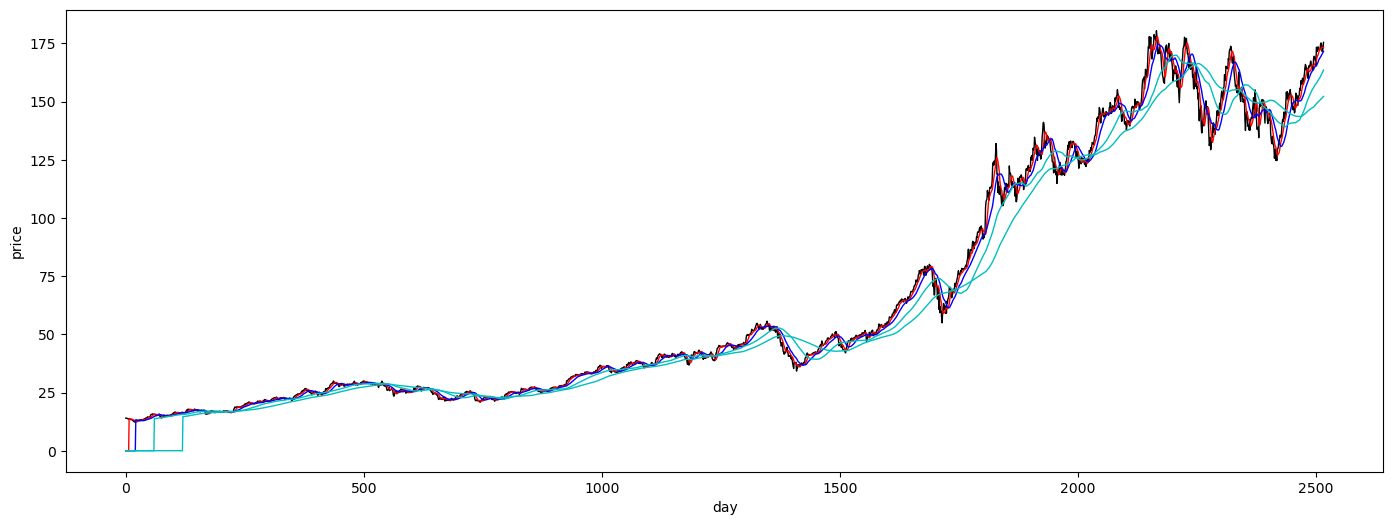

In [4]:
x = 'AAPL'
Stocks10yt = pd.DataFrame()


t = yf.Ticker(x)
#yf.pdr_override()
Stocks10yt = t.history(start=ten, end=today)
Stocks10yt = Stocks10yt.reset_index()
Stocks10yt = Stocks10yt['Close']

#moving averages
MMA7 = np.zeros(len(Stocks10yt))
MMA21 = np.zeros(len(Stocks10yt))
MMA60 = np.zeros(len(Stocks10yt))
MMA120=np.zeros(len(Stocks10yt))
for i in range(7,len(Stocks10yt)):
    MMA7[i] = float(np.mean(Stocks10yt[i-7:i]))
for i in range(21,len(Stocks10yt)):
    MMA21[i] = float(np.mean(Stocks10yt[i-21:i]))
for i in range(60,len(Stocks10yt)):
    MMA60[i] = float(np.mean(Stocks10yt[i-60:i]))
for i in range(120, len(Stocks10yt)):
    MMA120[i] = float(np.mean(Stocks10yt[i-120:i])) 

#plots
short = np.zeros(len(Stocks10yt))
long = np.zeros(len(Stocks10yt))
for i in range(60,len(Stocks10yt)):
    if MMA60[i] < MMA21[i] or MMA60[i] < MMA7[i]:
        long[i]=-1
    elif MMA60[i]>MMA21[i] or MMA60[i] > MMA7[i]:
        long[i]=+1
    elif MMA60[i] ==MMA21[i] or MMA60[i] == MA7[i]:
        long[i] = 0
    
    if MMA21[i] < MMA7[i]:
        short[i]=-1
    elif MMA21[i] > MMA7[i]:
        short[i]=+1
    elif MMA21[i] == MMA7[i]:
        short[i]=0

plt.figure(figsize=(17, 6))
plt.plot(Stocks10yt[:], lw=1, color="black") #OU process
plt.plot(MMA7[:], lw=1,color="r") #mean reversion
plt.plot(MMA21[:], lw=1,color="b") #brownian motion
plt.plot(MMA60[:], lw=1,color="c") #jump diffusion
plt.plot(MMA120[:], lw=1,color="c") #jump diffusion
plt.xlabel('day')
plt.ylabel('price');

In [7]:
mean = {'Mean':[np.mean(Stocks10yt)],'STD':[np.std(Stocks10yt)], 'variance':[np.std(Stocks10yt)**2], 'skew':[skew(Stocks10yt)], 'kurtosis':[kurtosis(Stocks10yt)]}
desc_stat = pd.DataFrame(mean)
desc_stat

,Mean,STD,variance,skew,kurtosis
0,66.159375,51.57741,2660.229237,0.850752,-0.871518


In [9]:
#linear og polynomie regression

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

x = np.array(range(len(Stocks10yt))).reshape((-1,1))
y = np.array(Stocks10yt)


import statsmodels.api as sm
polynomial_features= PolynomialFeatures(degree=1)
xp = polynomial_features.fit_transform(x)
xp.shape
results = sm.OLS(y, xp).fit()

#x_ = transformer.transform(x)
x_ = PolynomialFeatures(degree=1).fit_transform(x)
model = LinearRegression().fit(x_, y)

r_sq = model.score(x_, y)
model.intercept_
model.coef_
print(f"SKlearn coefficient of determination: {r_sq}, if below 0.9, than it's bad")
print(f"SKlearn intercept: {model.intercept_}")
print(f"SKlearn slope: {model.coef_}")

print(f"Statsmodels coefficient of determination: {results.rsquared}")
print(f"Statsmodels intercept: {results.params[0]}")
print(f"Statsmodels slope: {results.params}")

#results.summary()

SKlearn coefficient of determination: 0.8243069513618463, if below 0.9, than it's bad
SKlearn intercept: -14.91658398628718
SKlearn slope: [0.        0.0644483]
Statsmodels coefficient of determination: 0.8243069513618463
Statsmodels intercept: -14.916583986287181
Statsmodels slope: [-14.91658399   0.0644483 ]


Simuleringer

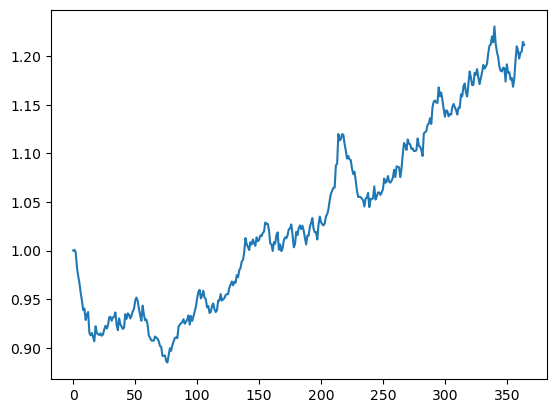

In [10]:
x0 = 1
kappa = 2.0
theta = 0.75 
lamb = 0.5 # jump likelihood
S0 = x0 
r = 0.05
sigma = 0.25
I = 10000
M = 365
dt = 1 / M
S0 = x0
v0 = 0.25 
kappav = 2 # same as square root diffusion (reversion factor)
thetav = 1 # long term mean (volatility)
rho = 0.5 # correlation b/w vol and the index
T = M
paths = 1        # number of paths 
mu = npr.normal(0,0.1) # jump amount
delta = 0.075 # variability in jump amount
rj = lamb * (math.exp(mu + 0.2 * delta ** 2) - 1)
Snpb = np.ones((10, I))

for j in range(10):


    # mean reversion
    def srd_euler():
        xh = np.zeros((M + 1, I))
        x = np.zeros_like(xh)
        xh[0] = x0
        x[0] = x0
        for t in range(1, M + 1):
            xh[t] = (xh[t - 1] +
                     kappa * (theta - np.maximum(xh[t - 1], 0)) * dt +
                     sigma * np.sqrt(np.maximum(xh[t - 1], 0)) *
                     math.sqrt(dt) * npr.standard_normal(I))
        x = np.maximum(xh, 0)
        return x
    x1 = srd_euler()

    # brownian
    S = np.zeros((M + 1, I))
    S[0] = S0
    for t in range(1, M + 1):
        S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2)/2 * dt +
                sigma/2 * math.sqrt(dt) * npr.standard_normal(I))


    #Stochastic Volatility
    corr_mat = np.zeros((2, 2))
    corr_mat[0, :] = [1.0, rho]
    corr_mat[1, :] = [rho, 1.0]
    cho_mat = np.linalg.cholesky(corr_mat)
    cho_mat

    ran_num = npr.standard_normal((2, M + 1, I))

    v = np.zeros_like(ran_num[0])
    vh = np.zeros_like(v)

    v[0] = v0 
    vh[0] = v0

    for t in range(1, M + 1):
        ran = np.dot(cho_mat, ran_num[:, t, :])
        vh[t] = (vh[t - 1] +
                 kappav * (thetav - np.maximum(vh[t - 1], 0)) * dt +
                 sigma * np.sqrt(np.maximum(vh[t - 1], 0)) * 
                 math.sqrt(dt) * ran[1])

    v = np.maximum(vh, 0)

    Sv = np.zeros_like(ran_num[0])
    Sv[0] = S0
    for t in range(1, M + 1):
        ran = np.dot(cho_mat, ran_num[:, t, :])
        Sv[t] = Sv[t - 1] * np.exp((r - 0.5 * v[t]) * dt +
                        np.sqrt(v[t]) * ran[0] * np.sqrt(dt))



    #jumps diffusion model

    Sj = np.zeros((M + 1, I))
    Sj[0] = S0
    sn1 = npr.standard_normal((M + 1, I))
    sn2 = npr.standard_normal((M + 1, I))
    poi = npr.poisson(lamb * dt, (M + 1, I)) # poission dist derived by lambda, dt
    for t in range(1, M + 1, 1):
        Sj[t] = Sj[t - 1] * (np.exp((r - rj - 0.5 * sigma ** 2)/2 * dt +
                           sigma/2 * math.sqrt(dt) * sn1[t]) +
                           (np.exp(mu + delta * sn2[t]) - 1) *
                           poi[t])
        Sj[t] = np.maximum(Sj[t], 0)


    #OU process
    T_vec, dt = np.linspace(0, T, I, retstep=True )   
    W = ss.norm.rvs(loc=0, scale=1, size=(paths,I))
    X = np.zeros((M,I))
    X[0] = x0

    std_asy = np.sqrt( sigma**2 /(2*kappa) )   # asymptotic standard deviation
    std_dt = np.sqrt( sigma**2 /(2*kappa) * (1-np.exp(-2*kappa*dt)) )
    for t in range(1,M):
        X[t] = theta + np.exp(-kappa*dt)*(X[t-1]-theta) + std_dt * W[0,t-1]

    for i in range(0,M):

        Snpb[j,i] = (np.mean([x1[i, :1],S[i, :1], Sj[i, :1], X[i,:1]]))    

    
Snppb = list()
for i in range(0,365):
    Snppb.append(np.mean(Snpb[1:10,i]))
plt.plot(Snppb)
plt.show()    


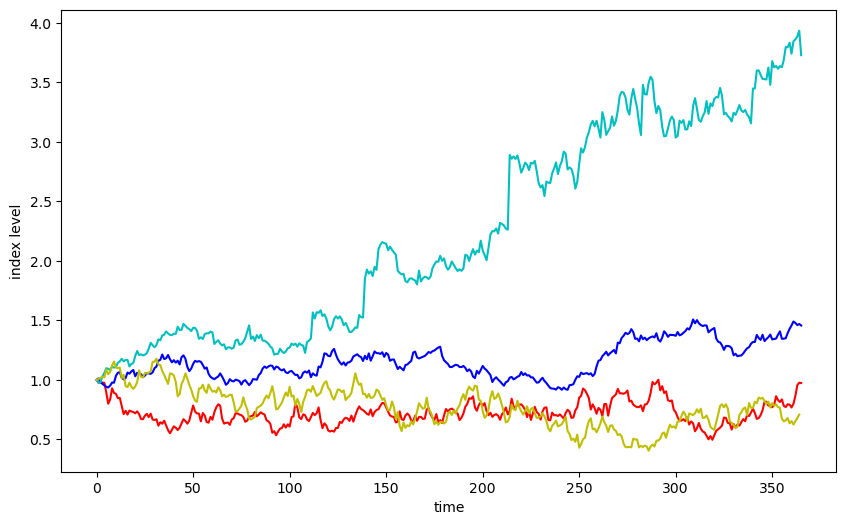

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(x1[:, :1], lw=1.5,color="r") #mean reversion
plt.plot(S[:, :1], lw=1.5,color="b") #brownian motion
#plt.plot(Sv[:,:1],lw=1.5,color="m") #Stochastic volatility
plt.plot(Sj[:, :1], lw=1.5,color="c") #jump diffusion
plt.plot(X[:,:1], lw=1.5, color="y") #OU process
plt.xlabel('time')
plt.ylabel('index level');

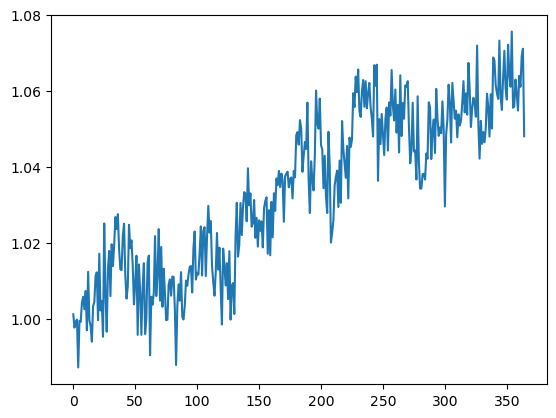

In [12]:
from random import gauss
from random import seed
from matplotlib import pyplot
%matplotlib inline

n = 10000
K_paths = 10
Snp = np.ones((K_paths, n))


for j in range(5):
    #Constants:
    delta = 0.005

    S_0= 1 
    alpha = 0.05
    sigma = 0.125
    r = 0.1

    #brownian motion
    def get_paths_BM (N_paths, alpha, sigma, S_0 = S_0, delta = delta, N = n):
        #np.random.seed(SEED)
        dws = np.random.normal(scale = np.sqrt(delta), size = (N_paths, N))
        S = np.ones((N_paths, N))*S_0
        for i in range(1,N):
            S_i = S[:,i-1]*( dws[:,i-1]*sigma)#+(alpha*delta)
            S[:,i:] += S_i.reshape(-1,1)
        return S


    ###(b)
    N_paths = 5
    paths = get_paths_BM(N_paths, alpha, sigma)

    # seed pseudorandom number generator
    # create dataset
    data = [gauss(1, 0.125) for i in range(n)]


    #Euler Maruyama
    def euler_maruyama(x0, T, mu, sigma, n):
        st = np.zeros(n + 1)
        st[0] = x0
        h = T / n
        for i in range(n):
            st[i + 1] = st[i] + mu(i * h, st[i]) * h + sigma(i * h, st[i]) * np.sqrt(h) * np.random.normal()
        return st

    def mu(t, st):
        return alpha * (0.5 - r0)

    def sigma(t, st):
        return sigma0#*t

    r0 = 0.105 #dunno
    alpha = 0 # mean drift?
    sigma0 = 0.35 # volatility
    T = 40 #?

    st = euler_maruyama(1, T, mu, sigma, n)
    st = st[:-1]

    #constants
    beta = 0.105
    alpha = beta
    r = 1
    sigma = 0.225
    delta = 0.125

    #rate paths?
    def get_paths_Rate (N_paths, alpha, beta, sigma, r = r, delta = delta, N = n):
        warnings.filterwarnings('ignore')
        #np.random.seed(SEED)
        dws = np.random.normal(scale = np.sqrt(delta), size = (N_paths, N))
        R = np.ones((N_paths, N))*r
        for i in range(1,N):
            R_i = (alpha-beta*R[:,i-1])*delta + np.sqrt(R[:,i-1])*dws[:,i-1]*sigma
            R[:,i:] += R_i.reshape(-1,1)
        R[R<=0] = np.nan
        return R


    R_paths = get_paths_Rate (5, alpha, beta, sigma, r = r, N = int(n))
    
    
    for i in range(0,n):
        R_i = np.mean(R_paths[1:5,i])
        P_i = np.mean(paths[1:5,i])
        Snp[j,i] = (np.mean([R_i,P_i,data[i],st[i]]))

Snpp = list()
for i in range(0,n):
    Snpp.append(np.mean(Snp[1:10,i]))
plt.plot(Snpp[:365])
plt.show()


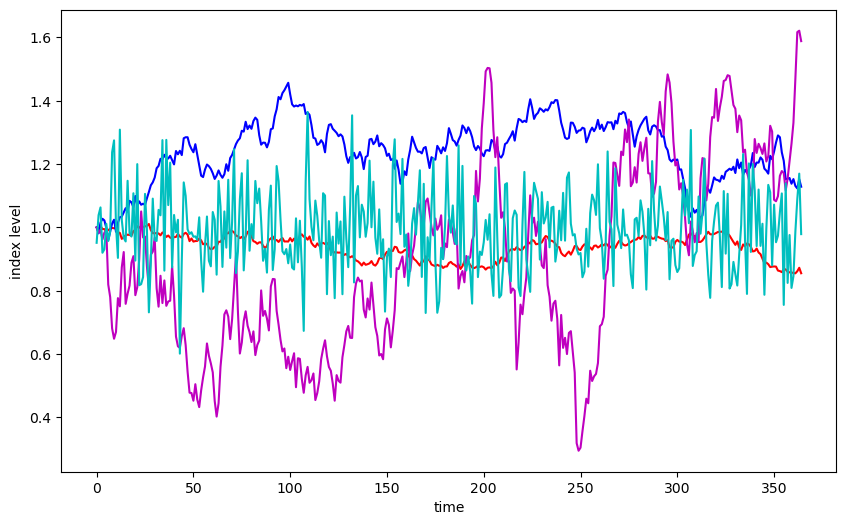

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(paths[1,:365], lw=1.5,color="r") #mean reversion
plt.plot(st[:365], lw=1.5,color="b") #brownian motion
plt.plot(R_paths[1,:365],lw=1.5,color="m") #Stochastic volatility
plt.plot(data[:365], lw=1.5,color="c") #jump diffusion
plt.xlabel('time')
plt.ylabel('index level');

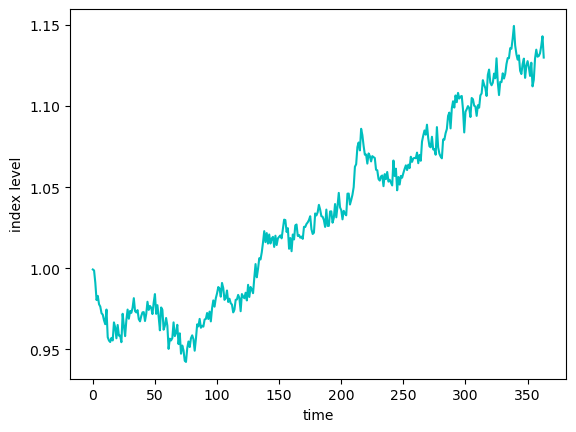

In [14]:
Snppb = np.asarray(Snppb)
Sum = np.zeros(365)
for i in range(1,365):
    Sum[i] = np.mean([Snpp[i],Snppb[i]])


plt.plot(Sum[1:365], lw=1.5,color="c") #jump diffusion
plt.xlabel('time')
plt.ylabel('index level')
plt.show()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1402.465
Date:                Wed, 31 May 2023   AIC                           2808.929
Time:                        01:48:57   BIC                           2818.745
Sample:                             0   HQIC                          2812.660
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8047      0.018     43.705      0.000       0.769       0.841
sigma2         0.9666      0.045     21.641      0.000       0.879       1.054
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.67
Prob(Q):                              0.93   Prob(JB):                         0.72
Heteroskedasticity (H):               1.00   Skew:                             0.01
Prob(H) (two-sided):                  0.97   Kurtosis:                         2.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

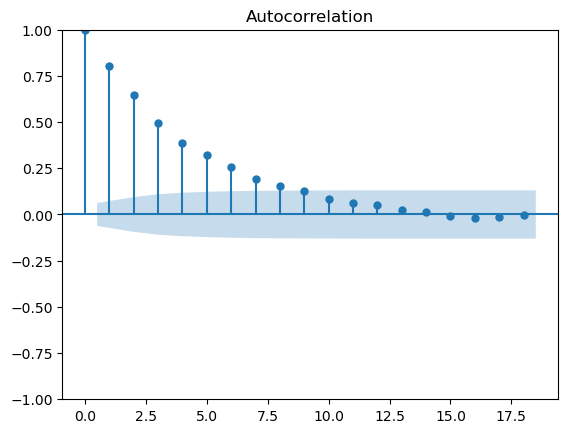

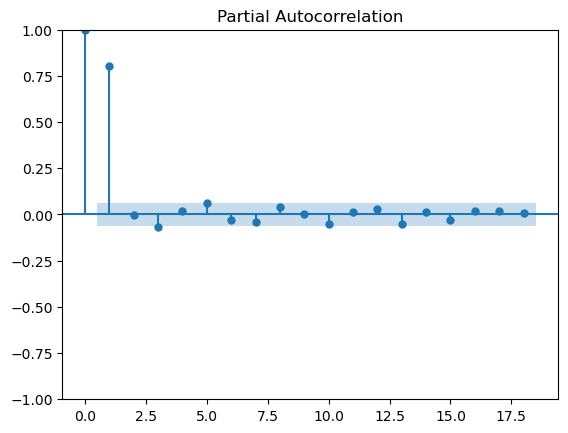

In [25]:
from statsmodels.tsa import arima_process, stattools
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics import tsaplots
from statsmodels.api import stats
import plotly.express as px
from matplotlib import pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA

x = arima_process.arma_generate_sample(ar=[1, -0.8], ma=[1], nsample=1000)
px.line(x)
tsaplots.plot_acf(x, lags=18); 
tsaplots.plot_pacf(x, lags=18);

stats.acorr_ljungbox(x, lags=5, return_df=True)
res_acf = stattools.acf(x, fft=True, qstat=True, nlags=10)

fig = make_subplots(rows=1, cols=3,
                    subplot_titles=("acf", "qstat", "pvalues"))
fig.add_trace(
    go.Scatter(x=[i for i in range(len(res_acf[0]))],y=res_acf[0]),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=[i for i in range(len(res_acf[1]))], y=res_acf[1]),
    row=1, col=2
)
fig.add_trace(
    go.Scatter(x=[i for i in range(len(res_acf[2]))],y=res_acf[2]),
    row=1, col=3
)

ar_model = AutoReg(x, lags=1, old_names=False).fit()
ar_model = ARIMA(endog=x, order=(1,0,0), trend='n').fit()
ar_model.summary()




# check correlations of squared observations
from random import gauss
from random import seed
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
%matplotlib inline
# seed pseudorandom number generator
seed(1)
# create dataset
data = Sum
# square the dataset
pyplot.plot(data)
pyplot.show()
squared_data = [x**2 for x in data]
# create acf plot
plot_acf(squared_data, lags = 20, alpha = 0.05)
pyplot.show()


# example of ARCH model
from random import gauss
from random import seed
from matplotlib import pyplot
from arch import arch_model
#warnings.warn()

seed(1)

# create dataset
data = [gauss(0, i*0.01) for i in range(0,100)]

# split into train/test
n_test = 10
train, test = data[:-n_test], data[-n_test:]


model = arch_model(Sum, mean='Zero', vol='ARCH', p=15)
#model = arch_model(train, mean='Zero', vol='GARCH', p=15, q=15)
#model = arch_model(train, vol='Garch', p=1, o=0, q=1, dist='Normal')
#res = model.fit(disp='off')
#display(res.summary()
model_fit = model.fit()


yhat = model_fit.forecast(horizon=10)

#forecast_vol = 0.1 * np.sqrt(res.params['omega'] + res.params['alpha[1]'] * res.resid**2 + res.conditional_volatility**2 * res.params['beta[1]'])

var = [i*0.01 for i in range(0,100)]
#pyplot.plot(var[-n_test:])


pyplot.plot(yhat.variance.values[-1, :])
pyplot.show()




<class 'pandas.core.frame.DataFrame'>


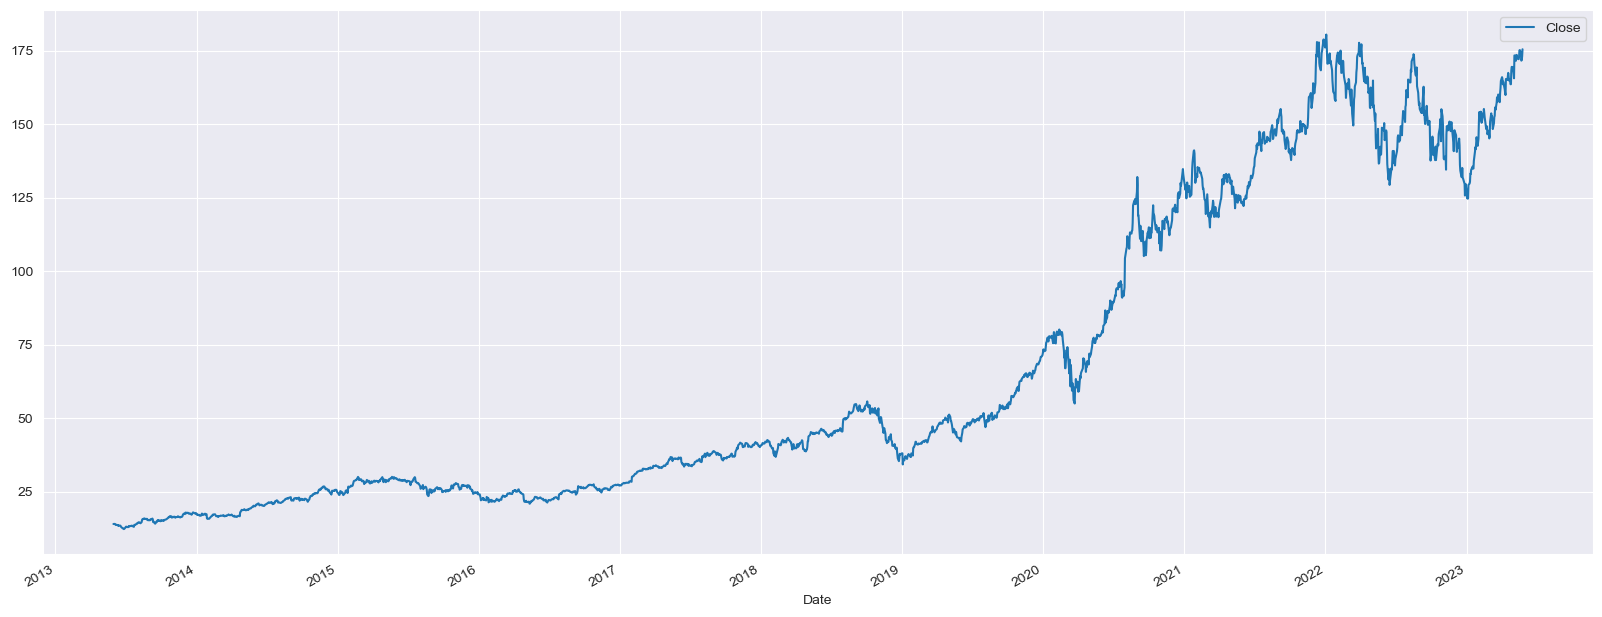

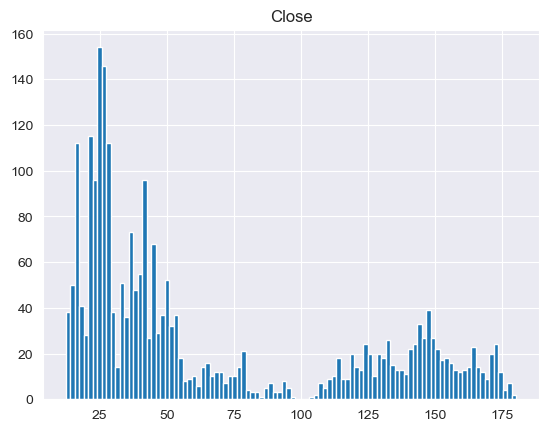

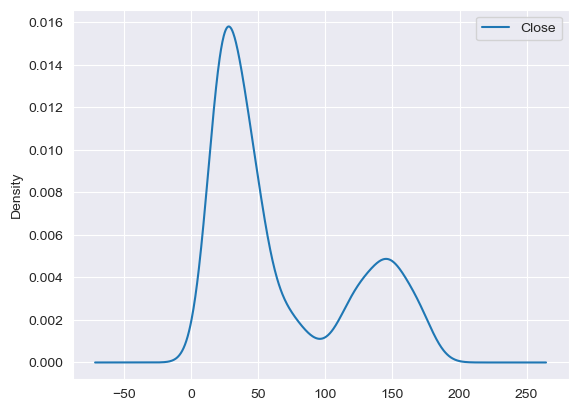

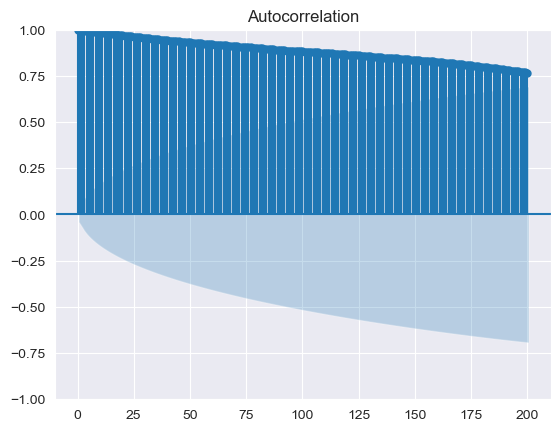

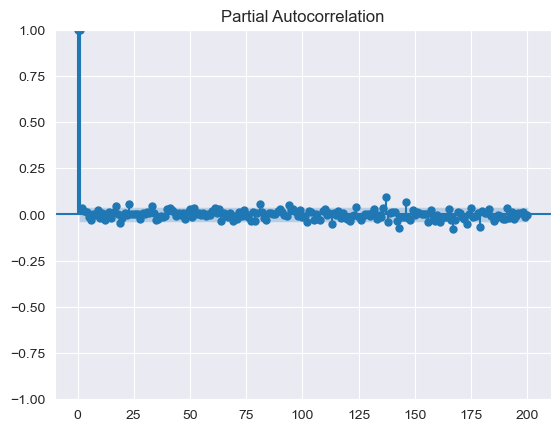

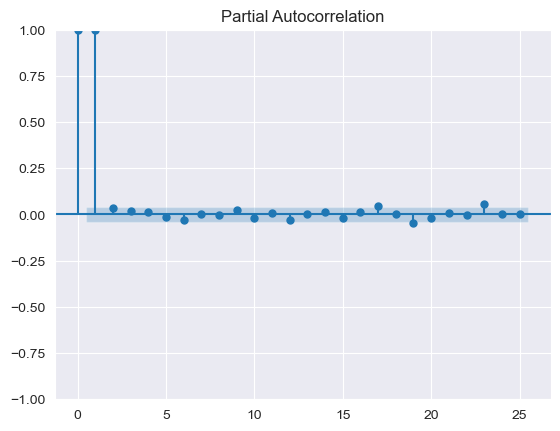

In [103]:
import random
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import pandas_datareader.data as dtr

import tensorflow as tf

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing
from arch import arch_model

import pmdarima as pm
import pylab

import scipy.fft
from scipy.fft import fft, fftfreq, ifft,  rfft, rfftfreq
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import seaborn as sns
sns.set_style('darkgrid')

from datetime import timedelta

import tensorflow as tf
keras = tf.keras

%matplotlib inline 
#notebook



ticker='AAPL' 
df_all = pd.DataFrame()
df = pd.DataFrame()

t = yf.Ticker(ticker)
#yf.pdr_override()
df_all = t.history(start=ten, end=today)
#df_all = df_all.reset_index()
#df_all = df_all['Close']

df_all['Diff']=df_all['Close']-df_all['Close'].shift(1)
df_all['LogClose']=np.log(df_all['Close'])
df_all['LogDiff']=df_all['LogClose']-df_all['LogClose'].shift(1)

df=df_all[1:]
df

ts=df[['Close']]
print(type(ts))
ts.plot(figsize=(20,8))

ts.describe()
ts.iloc[np.argmax(ts),:]
ts.hist(bins=100)
ts.plot(kind='kde');

# Quick check
plot_acf(ts, lags=200);
plot_pacf(ts, lags=200);
plot_pacf(ts, lags=25);

In [104]:
tsf = pd.DataFrame()
tsf=ts.asfreq('b');
#tsf=tsf.dropna()

tsf[tsf.isnull().any(axis=1)];

tsf.ffill(inplace=True);
display(tsf.head(15));
tsf.index  

,Close
Date,
2013-05-31 00:00:00-04:00,13.944797
2013-06-03 00:00:00-04:00,13.975492
2013-06-04 00:00:00-04:00,13.931771
2013-06-05 00:00:00-04:00,13.801544
2013-06-06 00:00:00-04:00,13.595346
2013-06-07 00:00:00-04:00,13.699224
2013-06-10 00:00:00-04:00,13.608680
2013-06-11 00:00:00-04:00,13.568678
2013-06-12 00:00:00-04:00,13.400932


DatetimeIndex(['2013-05-31 00:00:00-04:00', '2013-06-03 00:00:00-04:00',
               '2013-06-04 00:00:00-04:00', '2013-06-05 00:00:00-04:00',
               '2013-06-06 00:00:00-04:00', '2013-06-07 00:00:00-04:00',
               '2013-06-10 00:00:00-04:00', '2013-06-11 00:00:00-04:00',
               '2013-06-12 00:00:00-04:00', '2013-06-13 00:00:00-04:00',
               ...
               '2023-05-15 00:00:00-04:00', '2023-05-16 00:00:00-04:00',
               '2023-05-17 00:00:00-04:00', '2023-05-18 00:00:00-04:00',
               '2023-05-19 00:00:00-04:00', '2023-05-22 00:00:00-04:00',
               '2023-05-23 00:00:00-04:00', '2023-05-24 00:00:00-04:00',
               '2023-05-25 00:00:00-04:00', '2023-05-26 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=2606, freq='B')

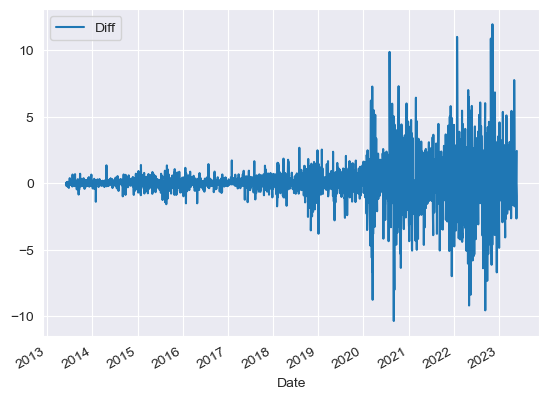

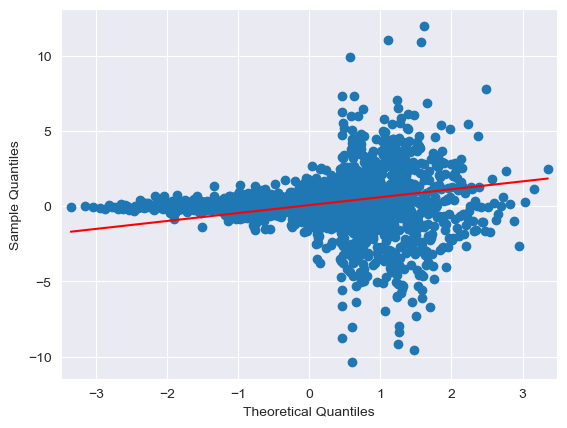

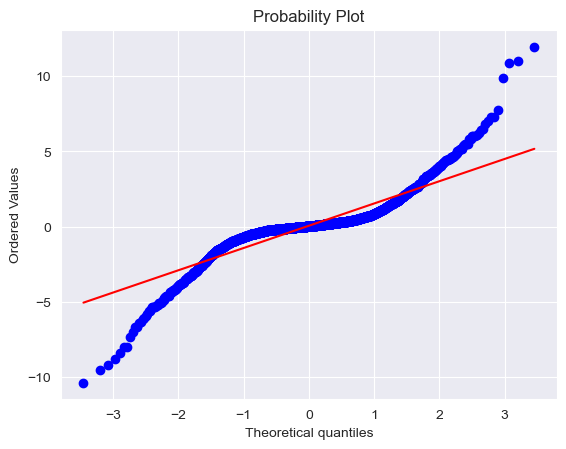

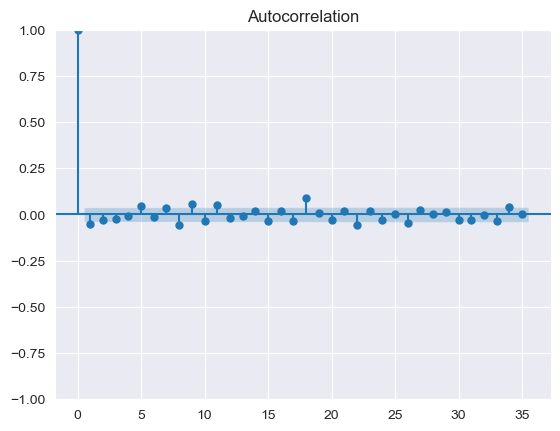

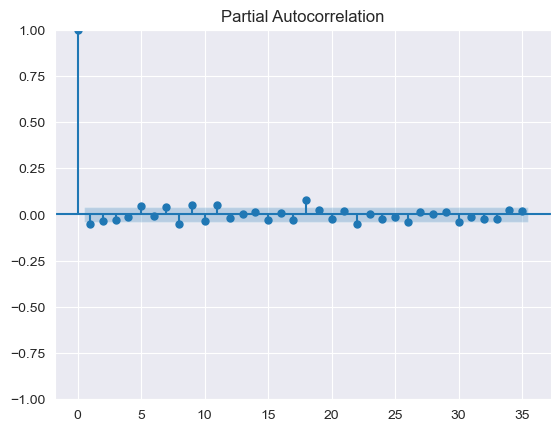

In [105]:
# Is it a random walk?
diff=df[['Diff']]
diff.plot()
sm.qqplot(diff, line='q');
plt.figure('QQ plot');
stats.probplot(diff['Diff'], plot=plt);
plot_acf(diff)
plot_pacf(diff);

In [109]:
tsf.index = pd.to_datetime(tsf.index).tz_localize(None)
tsf

,Close
Date,
2013-05-31,13.944797
2013-06-03,13.975492
2013-06-04,13.931771
2013-06-05,13.801544
2013-06-06,13.595346
...,...
2023-05-22,174.199997
2023-05-23,171.559998
2023-05-24,171.839996


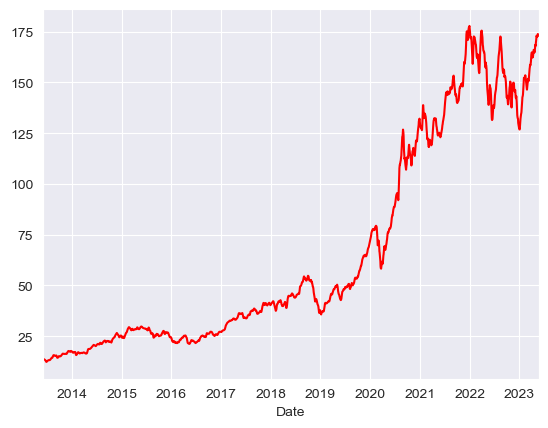

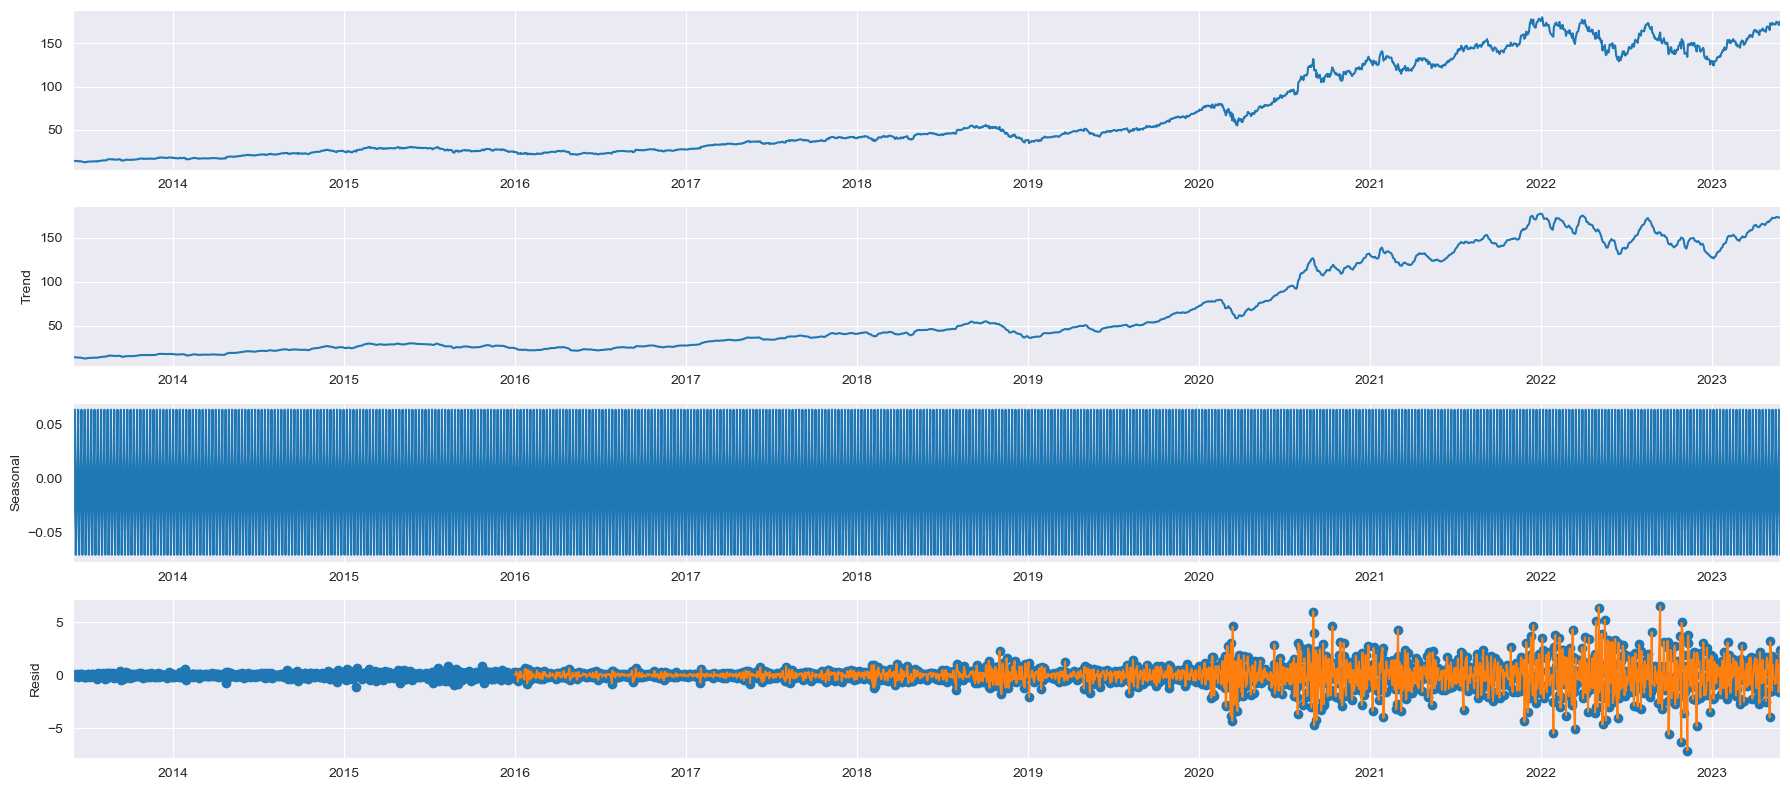

Duration is 3.862 second(s)


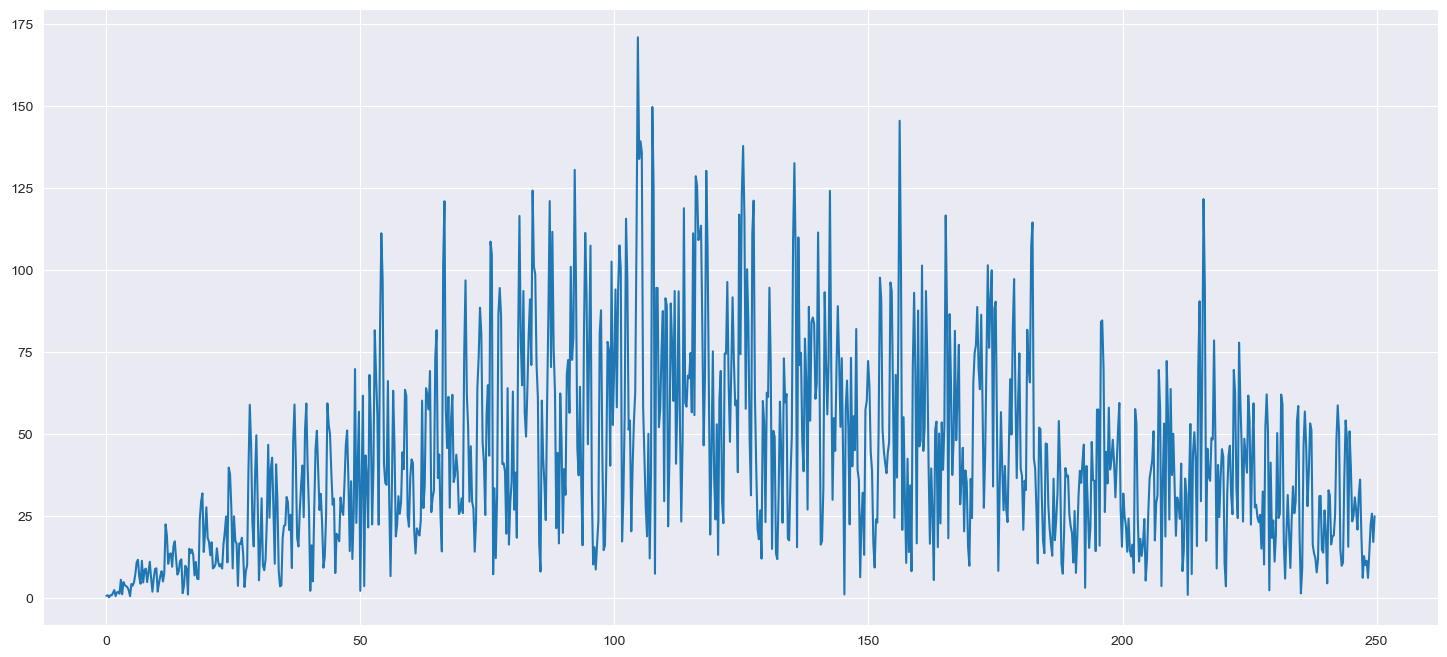

In [110]:

ts_dec=seasonal_decompose(tsf,  extrapolate_trend = 'freq')
ts_dec.trend.plot(color='r');
plt.show()
pylab.rcParams['figure.figsize'] = (18, 8)
ts_dec.plot();
tstrend=pd.DataFrame(ts_dec.trend)
tstrend
ts_rest=tsf['Close']-tstrend['trend']
ts_rest=ts_rest['2016':]
plt.plot(ts_rest)
plt.show()
ts_rest.isna().sum()
ts_rest.mean()
len(ts_rest)

# SAMPLE_RATE determines how many data points the signal uses to represent the sine wave per second. 
# So if the signal had a sample rate of 10 Hz and was a five-second sine wave, then it would have 10 * 5 = 50 data points.

# N=sample_rate * duration
#set N (window length)
N=int(len(ts_rest)    )
sample_rate=500 # Hertz=cycles per second (frequecy)

#set d (sample spacing) = inverse of the sampling rate
d=1/sample_rate

duration=  N*d  #seconds
print('Duration is {} second(s)'.format(duration))

ts_fft=fft(ts_rest.values)
ts_freq=fftfreq(N,  d)  # Return the Discrete Fourier Transform sample frequencies (sample frequency POINTS)
# If the sample spacing 'd' is in seconds then the frequency is cycles per second.

plt.plot(ts_freq [:N//2] , np.abs(ts_fft[0:N//2]  ));
plt.show()

In [ ]:
from scipy.io.wavfile import write

# Remember SAMPLE_RATE = 44100 Hz is our playback rate
write("mywave.wav", int(sample_rate), np.int16(ts_rest.values) )


target_freq=40
pts_per_freq=len(ts_freq)/ (sample_rate)
target_id=int(  pts_per_freq* target_freq)
ts_fft[target_id:-target_id]=0
#ts_fft[:N-target_freq:-1]=0
plt.plot(ts_freq,  np.abs(ts_fft));
plt.show()

ts_ifft=ifft(ts_fft)
#In case you want to do predictions extending the ifft
c=[*ts_ifft, *ts_ifft]
print( len(c) )
plt.plot( c, color='b',  label='IFFT' )
plt.show()
plt.plot(ts_rest.index, ts_ifft, color='b',  label='IFFT' )
ts_rest.plot(color='r', figsize=(28,8), alpha=0.4,  label='actual')
plt.title('IFFT')
plt.legend(loc='best')
plt.show()
a= ts_denoised=tstrend['trend']['2016':]+ts_ifft
b= tsf['Close']['2016':]
a.plot(color='b', label='denoised',  figsize=(24,12), animated=True)
b.plot(color='r',linestyle='-', lw=1,  alpha=0.8, label='original')
plt.title('De-noised Time Series')
plt.legend(loc='best')
plt.show()

In [ ]:
sma={}
for k in [20, 50, 200]:
    sma[k]=ts.rolling(k).mean()

plt.figure()
sma[20]['Close'].plot(color='m', label='SMA20',  figsize=(24,12),alpha=0.5,  animated=True)
sma[50]['Close'].plot(color='darkorange', label='SMA50', alpha=0.7,  animated=True)
sma[200]['Close'].plot(color='yellow', label='SMA200',alpha=0.7,    animated=True)
ts['Close'].plot(color='black',   alpha=1, label='original')
plt.title('Time Series and SMA')
plt.legend(loc='best')
plt.show()


result = adfuller(ts)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
result = adfuller(diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
results={}
model = pm.auto_arima(ts, start_p=1, start_q=1, 
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                   #   d=0,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                  #    D=0, 
                  #    information_criterion='aic', # default, (‘aic’, ‘bic’, ‘hqic’, ‘oob’
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

model.plot_diagnostics(figsize=(22,8))
plt.show()

# Try it, fit model
model_1 =  sm.tsa.statespace.SARIMAX(ts, order=(0,1,0))
model_fit = model_1.fit(return_params=0)
# summary of fit model
print(model_fit.summary())
residuals= model_fit.resid[1:]
plt.figure()

residuals.plot();
plt.figure()
residuals.hist(bins=100);
residuals.describe()
# Actual vs Fitted
tsf.plot(color='b', label='actual');
model_fit.predict().plot(figsize=(24,10), color='r', label='ARIMA')
plt.show()
# Alternative way to plot them

tsf.plot(color='b', label='actual');
model_fit.fittedvalues.plot(color='r');
plt.show();

In [ ]:
# evaluate forecasts
mse = (mean_squared_error(ts, model_fit.predict()  ))
print('Test MSE: %.3f' % mse)

mae = (mean_absolute_error(ts, model_fit.predict()  ))
print('Test MAE: %.3f' % mae)

logts=df[['LogClose']];
logts.plot();
logts.hist(bins=100);
logts.describe()
logtsf=logts.asfreq('b');

logtsf[logtsf.isnull().any(axis=1)];

logtsf.ffill(inplace=True);
display(logtsf.head(15));
logtsf.index        #ts.unstack().values

#pd.Series(ts.unstack().values)

In [ ]:
logts_dec=seasonal_decompose(logtsf,  extrapolate_trend = 'freq')

logts.plot(color='b');
logts_dec.trend.plot(color='r');
plt.show()
logts_dec.plot();

# This is the difference of the logs, i.e. the r's

logdiff=df[['LogDiff']];
logdiff.plot()
logdiff.hist(bins=100);
logdiff.plot(kind='kde')
logdiff.describe()

result = adfuller(logdiff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

plot_acf(logts, lags=200)
plot_pacf(logts);

model_ld = pm.auto_arima(logts, start_p=1, start_q=1, 
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=4, max_q=4, # maximum p and q
                      m=1,              # frequency of series
                      #d=1,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      #D=0, 
                      information_criterion='aic', # default, (‘aic’, ‘bic’, ‘hqic’, ‘oob’
                     # trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model_ld.summary())
model_ld.plot_diagnostics(figsize=(22,8))
plt.show()

# fit model

#model_ld_1 = model_ld  
model_ld_1 =  sm.tsa.statespace.SARIMAX(logts, order=(0,1,0))
model_fit_ld = model_ld_1.fit(  return_params=0)
# summary of fit model
print(model_fit_ld.summary())
model_fit_ld.predict()

# evaluate forecasts
mse_ld = mean_squared_error(ts, np.exp( model_fit_ld.predict()  )  )
print('Test MSE: %.3f' % mse_ld)

mae_ld = mean_absolute_error(ts, np.exp( model_fit_ld.predict()  ))
print('Test MAE: %.3f' % mae_ld)

In [111]:
keras = tf.keras

def window_dataset_atend(ts, window_size=30, target_length=1, batch_size=1):
    series=ts.values.flatten()
    series = tf.expand_dims(series, axis=-1)
    ds=tf.data.Dataset.from_tensor_slices(series)
    ds=ds.window(window_size+target_length, shift=1, drop_remainder=True)
    ds=ds.flat_map(lambda w: w.batch(window_size+target_length)  )
    ds=ds.map(lambda w: (w[:-target_length], w[-target_length:]) )
    ds=ds.shuffle(len(series))
    ds=ds.batch(batch_size).prefetch(1)
    #ds=ds.as_numpy_iterator()
    return ds

def window_dataset_eachstep(ts, window_size=30, target_length=1, batch_size=1):
    #series=ts.values.flatten()
    series=ts[:]
    series.columns=['0']
    for i in range(1,target_length+1):
        series[str(i)]=series['0'].shift(-i)
    series=series.iloc[:-target_length,:]
    #series = tf.expand_dims(series, axis=-1)
    ds=tf.data.Dataset.from_tensor_slices(series)
    ds=ds.window(window_size, shift=1, drop_remainder=True)
    ds=ds.flat_map(lambda w: w.batch(window_size)  )
    ds=ds.map(lambda w: (   tf.expand_dims(w[...,0], axis=-1)   , w[...,-target_length:]) )
    ds=ds.shuffle(len(series))
    ds=ds.batch(batch_size).prefetch(1)
    #ds=ds.as_numpy_iterator()
    return ds

def last_time_step_mse(Y_true, Y_pred):
    return keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])


def plot_series(time, series, format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)
    

def sequential_window_dataset(series, window_size):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=window_size, drop_remainder=True)
    ds = ds.flat_map(lambda window: window.batch(window_size + 1))
    ds = ds.map(lambda window: (window[:-1], window[1:]))
    return ds.batch(1).prefetch(1)

In [139]:
split='2023-04'
ts_recent= (  tsf['2021':])
ts_train=ts_recent[:split]
ts_test=ts_recent[ts_train.index[-1]+timedelta(days=1):ts_train.index[-1]+timedelta(days=40)]



train_set=window_dataset_eachstep(ts_train, window_size=30, target_length=5)
valid_set=window_dataset_eachstep(ts_test,target_length=5)

In [140]:
ts_test

,Close
Date,
2023-05-01,169.355743
2023-05-02,168.307190
2023-05-03,167.218704
2023-05-04,165.560989
2023-05-05,173.330261
2023-05-08,173.260345
2023-05-09,171.532745
2023-05-10,173.320267
2023-05-11,173.510010


Epoch 1/50
552/552 [==============================] - 4s 4ms/step - loss: 7072.1689 - last_time_step_mse: 4851.3340 - val_loss: 697.2403 - val_last_time_step_mse: 67.0939 - lr: 1.0000e-04
Epoch 2/50
552/552 [==============================] - 2s 4ms/step - loss: 182.3421 - last_time_step_mse: 62.3358 - val_loss: 47.0568 - val_last_time_step_mse: 5.3208 - lr: 1.0798e-04
Epoch 3/50
552/552 [==============================] - 3s 5ms/step - loss: 52.7642 - last_time_step_mse: 50.7449 - val_loss: 31.6111 - val_last_time_step_mse: 5.6644 - lr: 1.1659e-04
Epoch 4/50
552/552 [==============================] - 2s 4ms/step - loss: 45.6475 - last_time_step_mse: 48.6767 - val_loss: 36.6890 - val_last_time_step_mse: 10.8710 - lr: 1.2589e-04
Epoch 5/50
552/552 [==============================] - 2s 3ms/step - loss: 40.5137 - last_time_step_mse: 41.9233 - val_loss: 19.7311 - val_last_time_step_mse: 3.8794 - lr: 1.3594e-04
Epoch 6/50
552/552 [==============================] - 2s 4ms/step - loss: 36.1503 

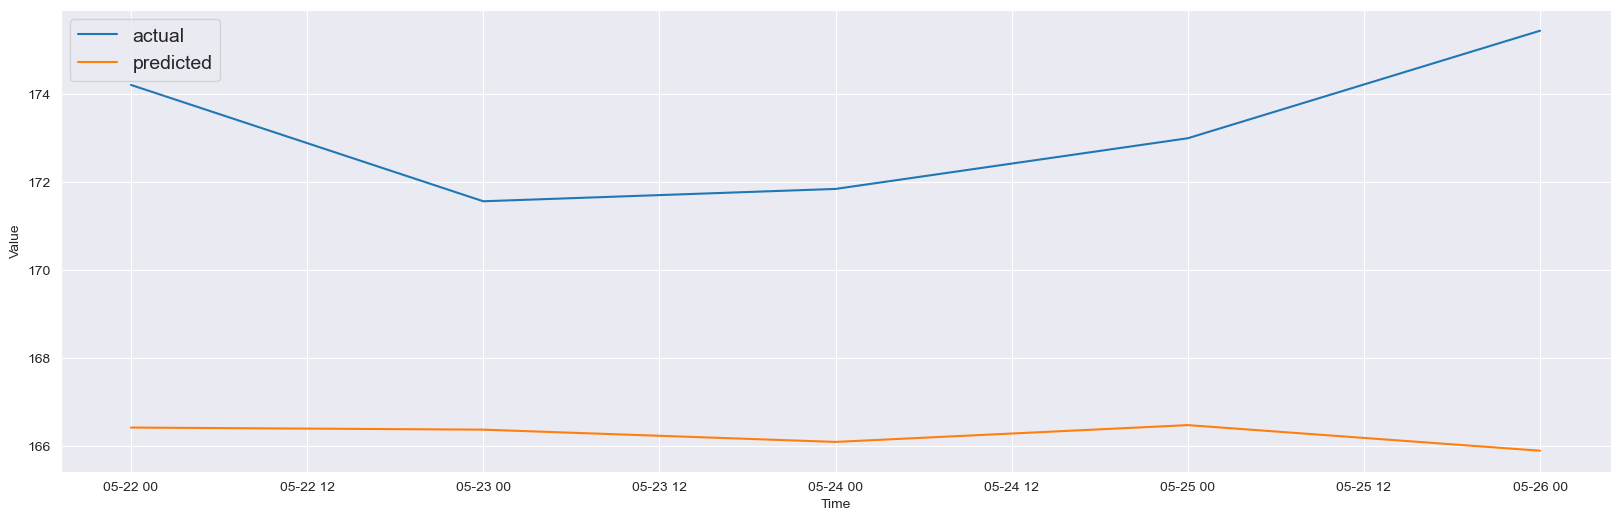

In [114]:
split='2023-05'
ts_recent= (  tsf['2021':])
ts_train=ts_recent[:split]
ts_test=ts_recent[ts_train.index[-1]+timedelta(days=1):ts_train.index[-1]+timedelta(days=40)]



train_set=window_dataset_eachstep(ts_train, window_size=30, target_length=5)
valid_set=window_dataset_eachstep(ts_test, target_length=5)

np.random.seed(2)
tf.random.set_seed(2)

model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=[None, 1]))
for rate in (1, 2, 4, 8) * 2:
    model.add(keras.layers.Conv1D(filters=20, kernel_size=2, padding="causal",
                                  activation="relu", dilation_rate=rate))
model.add(keras.layers.Conv1D(filters=5, kernel_size=1))

lr_schedule = keras.callbacks.LearningRateScheduler(    lambda epoch: 1e-4 * 10**(epoch / 30))

optimizer = keras.optimizers.Adam(learning_rate=3e-3)

model.compile(loss="mse", optimizer=optimizer, metrics=[last_time_step_mse])

history = model.fit(train_set, epochs=50,
                   validation_data=valid_set,
                    callbacks=[lr_schedule]
                    )


wav5_forecast = model.predict(valid_set)
wav5_forecast.shape
plt.figure(figsize=(20, 6))
plot_series(ts_test[-5:].index, ts_test.values[-5:], label='actual')
plot_series(ts_test[-5:].index, wav5_forecast[-1,-1,:], label='predicted')



In [116]:
fc=model.forecast(10)

AttributeError: 'Sequential' object has no attribute 'forecast'

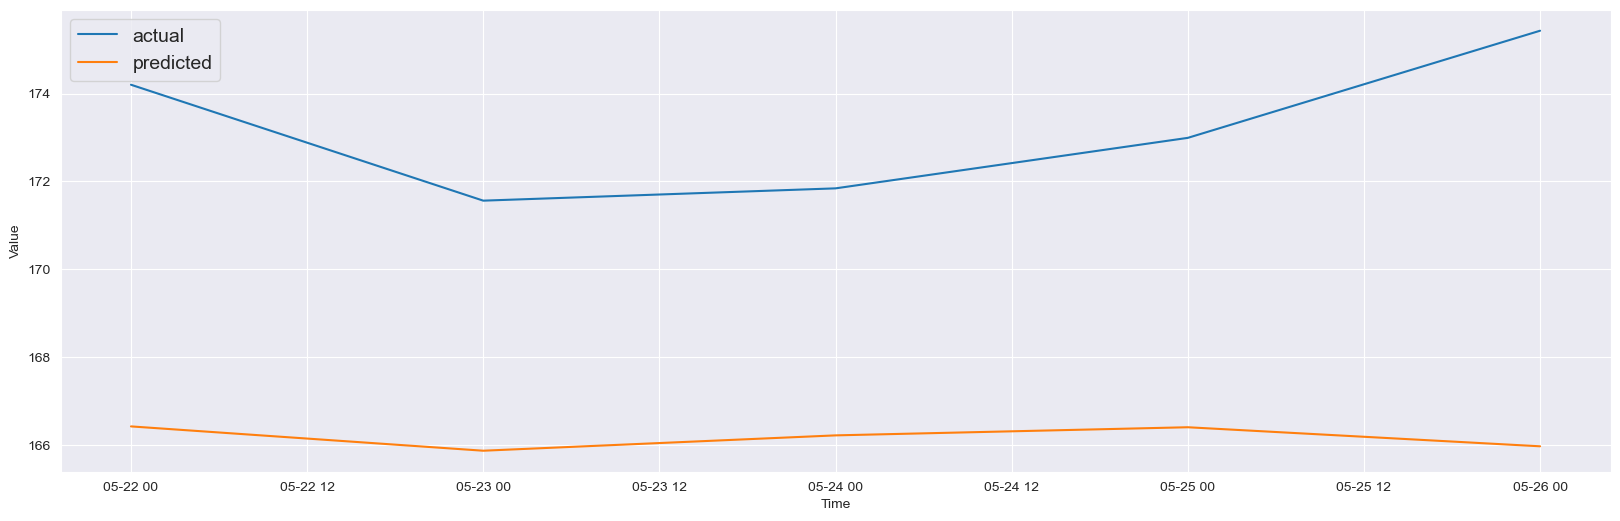

In [115]:
plt.figure(figsize=(20, 6))
plot_series(ts_test[-5:].index, ts_test.values[-5:], label='actual')
plot_series(ts_test[-5:].index, wav5_forecast[4,1,:], label='predicted')

In [90]:
print(wav5_forecast[-1,-1,:])
print(wav5_forecast[-1,0,:])
print(wav5_forecast[0,1,:])

#plot_series(ts_test[-1:].index, wav5_forecast[-1,-1,:], label='predicted')
len(wav5_forecast)

[34.326454 34.29991  34.09935  33.839977 33.83379 ]
[33.898113 33.76452  33.686886 33.521114 33.347645]
[34.131336 33.968494 33.838615 33.783695 33.585102]


49

In [ ]:


plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-5, 1e-1, 0, 3])

train_set=window_dataset_eachstep(ts_train, window_size=30, target_length=5)
valid_set=window_dataset_eachstep(ts_test,target_length=5)


np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=[None, 1]))
for rate in (1, 2, 4, 8) * 2:
    model.add(keras.layers.Conv1D(filters=20, kernel_size=2, padding="causal",
                                  activation="relu", dilation_rate=rate))
model.add(keras.layers.Conv1D(filters=5, kernel_size=1))


optimizer = keras.optimizers.Adam(learning_rate=2e-4)

model.compile(loss="mse", optimizer=optimizer, metrics=[last_time_step_mse])

history = model.fit(train_set, epochs=50,
                   validation_data=valid_set,
                   # callbacks=[lr_schedule]
                    )

wav5_forecast = model.predict( valid_set)
wav5_forecast.shape
plt.figure(figsize=(20, 6))
plot_series(ts_test[-5:].index, ts_test.values[-5:], label='actual')
plot_series(ts_test[-5:].index, wav5_forecast[-1,-1,:], label='predicted')

Epoch 1/50
2228/2228 [==============================] - 9s 3ms/step - loss: 52.8279 - last_time_step_mse: 33.6740 - val_loss: 0.4002 - val_last_time_step_mse: 0.3734
Epoch 2/50
2228/2228 [==============================] - 6s 3ms/step - loss: 0.3635 - last_time_step_mse: 0.3736 - val_loss: 0.4051 - val_last_time_step_mse: 0.4200
Epoch 3/50
2228/2228 [==============================] - 6s 3ms/step - loss: 0.3566 - last_time_step_mse: 0.3691 - val_loss: 0.3138 - val_last_time_step_mse: 0.2951
Epoch 4/50
2228/2228 [==============================] - 6s 3ms/step - loss: 0.3469 - last_time_step_mse: 0.3522 - val_loss: 0.3351 - val_last_time_step_mse: 0.3047
Epoch 5/50
2228/2228 [==============================] - 6s 3ms/step - loss: 0.3405 - last_time_step_mse: 0.3393 - val_loss: 0.3065 - val_last_time_step_mse: 0.2823
Epoch 6/50
2228/2228 [==============================] - 6s 3ms/step - loss: 0.3308 - last_time_step_mse: 0.3416 - val_loss: 0.3123 - val_last_time_step_mse: 0.2799
Epoch 7/50
222

NameError: name 'plot_series' is not defined

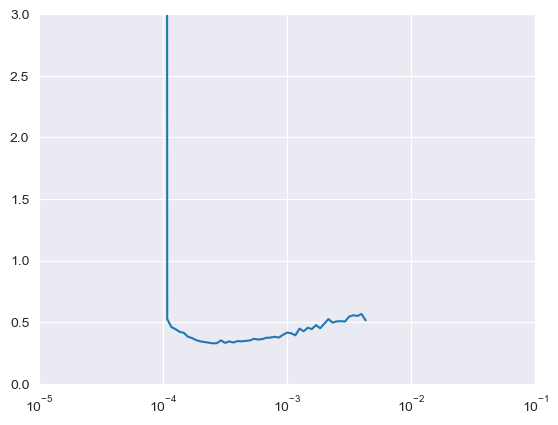

<Figure size 2000x600 with 0 Axes>

In [73]:



keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30

train_set = sequential_window_dataset(     list(ts_train.values.flatten())     , window_size)
valid_set = sequential_window_dataset(        list(ts_test.values.flatten())            , window_size)

model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=[None, 1]))
for rate in (1, 2, 4, 8) * 2:
    model.add(keras.layers.Conv1D(filters=20, 
                                  kernel_size=2, 
                                  padding="causal",
                                  activation="relu", 
                                  dilation_rate=rate))
    
model.add(keras.layers.Conv1D(filters=1, kernel_size=1))

lr_schedule = keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-4 * 10**(epoch / 30))

optimizer = keras.optimizers.Adam(learning_rate=3e-3)

model.compile(loss='mse',
              optimizer=optimizer, 
              metrics=['mae'])

history = model.fit(train_set, epochs=70,
                   validation_data=valid_set,
                    callbacks=[lr_schedule]
                    )



plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-4, 1e-1, 0, 30])

keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30

train_set = sequential_window_dataset(     list(ts_train.values.flatten())     , window_size)
valid_set = sequential_window_dataset(        list(ts_test.values.flatten())            , window_size)

model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=[None, 1]))
for rate in (1, 2, 4, 8) * 2:
    model.add(keras.layers.Conv1D(filters=20, 
                                  kernel_size=2, 
                                  padding="causal",
                                  activation="relu", 
                                  dilation_rate=rate))
    
model.add(keras.layers.Conv1D(filters=1, kernel_size=1))


optimizer = keras.optimizers.Adam(learning_rate=6.5e-4)

model_checkpoint = keras.callbacks.ModelCheckpoint(
    "my_checkpoint_wvn1.h5", save_best_only=True)

early_stopping = keras.callbacks.EarlyStopping(patience=50)

model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer, 
              metrics='mae')

history = model.fit(train_set, epochs=200,
                   validation_data=valid_set,
                     callbacks=[early_stopping, model_checkpoint])

model = keras.models.load_model("my_checkpoint_wvn1.h5")

wavenet_forecast = model.predict( ts_recent.values.flatten()[np.newaxis, :, np.newaxis])
#rnn_forecast = rnn_forecast[0, len(ts_train)-1 :-1, 0]
wavenet_forecast.shape
wavenet_forecast = wavenet_forecast[0, len(ts_train)-1 :-1,0]
wavenet_forecast.shape
len(ts_train)

plt.figure(figsize=(20, 6))
plot_series(ts_test.index, ts_test.values, label='Actual Values')
plot_series(ts_test.index, wavenet_forecast[:], label='Predicted')

wavenet_forecast[-5:-1,]
ts.tail()

mae=keras.metrics.mean_absolute_error(ts_test.values.flatten(), wavenet_forecast).numpy()
mae
mse=keras.metrics.mean_squared_error(ts_test.values.flatten(), wavenet_forecast).numpy()
mse

In [74]:
wavenet_forecast[-5:-1,]

NameError: name 'wavenet_forecast' is not defined

In [26]:
def rmse_tr(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
skor = rmse_tr(df.loc[df.index[1000:], 'forecast_vol'], df.loc[df.index[1000:], 'Volatility'])
print("Root Mean Squared Error of the model is calculated as ",skor)
df.shape

training_set = df.iloc[:, 11:12].values
# 100 timestep ve 1 çıktı ile data yapısı oluşturalım
X_train = []
y_train = []
for i in range(1000, df.shape[0]):
    X_train.append(training_set[i-1000:i,0])
    y_train.append(training_set[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 10, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.1))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 10, return_sequences = True))
regressor.add(Dropout(0.1))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 10, return_sequences = True))
regressor.add(Dropout(0.1))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 10))
regressor.add(Dropout(0.1))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

regressor.save('my_modelp1.h5')

from keras.models import load_model
regressor = load_model('my_modelp1.h5')

predicted_stock_price = regressor.predict(X_train)

# Visualising the results
plt.figure(figsize=(18,6))
plt.plot(df.iloc[1000:, 11:12].values, color = 'red', label = 'Observed Volatility')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Volatility By LSTM')
plt.title('Real Rolling Volatility vs Forecast of LSTM')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()
plt.show()

skor2 = rmse_tr(predicted_stock_price, np.array(df.loc[df.index[1000:], 'Volatility']))
print("Root Mean Squared Error of the model is calculated as ",skor2)

training_set = df.iloc[:, 11:13].values
# 100 timestep ve 1 çıktı ile data yapısı oluşturalım
X_train = []
y_train = []
for i in range(1000, df.shape[0]):
    X_train.append(training_set[i-1000:i,:])
    y_train.append(training_set[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 2))

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 10, return_sequences = True, input_shape = (X_train.shape[1], 2)))
regressor.add(Dropout(0.1))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 10, return_sequences = True))
regressor.add(Dropout(0.1))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 10, return_sequences = True))
regressor.add(Dropout(0.1))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 10))
regressor.add(Dropout(0.1))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

regressor.save('my_modelp2.h5')

from keras.models import load_model
regressor = load_model('my_modelp2.h5')

predicted_stock_price = regressor.predict(X_train)

# Visualising the results
plt.figure(figsize=(18,6))
plt.plot(df.iloc[1000:, 11:12].values, color = 'red', label = 'Observed Volatility')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Volatility By LSTM-GARCH(1,1)')
plt.title('Real Rolling Volatility vs Forecast of LSTM-GARCH(1,1)')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()
plt.show()

#skor3 = rmse_tr(predicted_stock_price, np.array(df.loc[df.index[1000:], 'Volatility']))
#print("Root Mean Squared Error of the model is calculated as ",skor3)

NameError: name 'df' is not defined

In [ ]:
#fc=model_tt_fit.predict( start=ts_train.index[-1]+ timedelta(days=1) , end=ts_test.index[-1] , alpha=0.05)
fc=model_tt_fit.predict( start=ts_test.index[0], end=ts_test.index[-1] , dynamic=True, alpha=0.05)

#fc=model_tt_fit.forecast(10)

#Forecast=model_tt_fit.predict(start=len(ts_train), 
                           # end=len(ts_train)+len(ts_test)-1, dynamic=True)

## Bonds

In [ ]:
buy/sell

In [ ]:
data = [
    [ "15-06-2018", "15-06-2022", 4.75, 500 ],
    [ "21-07-2017", "21-07-2027", 0.25, 100 ],
    [ "17-02-2015", "17-02-2045", 1.50, 250 ],   
]
bonds = pd.DataFrame(data, columns=["start", "maturity", "coupon", "notional"])


def makeBond(row):
    start, maturity, coupon, notional = row
    startDate = ql.Date(start, "%d-%m-%Y")
    maturityDate = ql.Date(maturity, "%d-%m-%Y")
    return ql.FixedRateBond(2, ql.TARGET(), 100, startDate, maturityDate, ql.Period("1Y"), [coupon], ql.ActualActual())

yts = ql.YieldTermStructureHandle(
    ql.FlatForward(2, ql.TARGET(), 0.05, ql.Actual360())
)
engine = ql.DiscountingBondEngine(yts)
bonds['bond'] = bonds.apply(makeBond, axis=1)
bonds['bond'].apply(lambda x: x.setPricingEngine(engine))
bonds['bond'].apply(lambda x: x.NPV()).sum()


class BondPortfolio(pd.DataFrame):
    def makeBond(self, row):
        start, maturity, coupon, notional = row
        startDate = ql.Date(start, "%d-%m-%Y")
        maturityDate = ql.Date(maturity, "%d-%m-%Y")
        return ql.FixedRateBond(2, ql.TARGET(), 100, startDate, maturityDate, ql.Period("1Y"), [coupon], ql.ActualActual())
    def makeBonds(self):
        self['bond'] = self.apply(self.makeBond, axis=1)
    def setPricingEngine(self, engine):
        self['bond'].apply(lambda x: x.setPricingEngine(engine))
    def NPV(self):
        return self['bond'].apply(lambda x: x.NPV()).sum()
        
portfolio = BondPortfolio(data, columns=["start", "maturity", "coupon", "notional"])
portfolio.makeBonds()
portfolio.setPricingEngine(engine)
portfolio.NPV()

In [ ]:
#bond pricing



!pip install sympy==1.8.0
from sympy import *
from google.colab import files
from matplotlib import pyplot as plt
import numpy as np
import math

init_printing()


# Importing Bond_Utils.py
uploaded = files.upload()
import Bond_Utils as BU

Pcb = Matrix([[98.0],[98.5],[100.0], [99.5], [99.0], [100.5], [101.0], [101.0], [101.5], [100.5]])
Pcb


CF = Matrix([[100.25, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0.375, 100.375, 0, 0, 0, 0, 0, 0, 0, 0],
            [0.5, 0.5, 100.5, 0, 0, 0, 0, 0, 0, 0],
            [0.625, 0.625, 0.625, 100.625, 0, 0, 0, 0, 0, 0],
            [0.75, 0.75, 0.75, 0.75, 100.75, 0, 0, 0, 0, 0],
            [0.85, 0.85, 0.85, 0.85, 0.85, 100.85, 0, 0, 0, 0],
            [0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 100.9, 0, 0, 0],
            [1, 1, 1, 1, 1, 1, 1, 101, 0, 0],
            [1.125, 1.125, 1.125, 1.125, 1.125, 1.125, 1.125, 1.125, 101.125, 0],
            [1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 101.25]])
CF

B0_1, B0_2, B0_3, B0_4, B0_5, B0_6, B0_7, B0_8, B0_9, B0_10 = symbols('B(0\,1), B(0\,2), B(0\,3), B(0\,4), B(0\,5), B(0\,6), B(0\,7), B(0\,8), B(0\,9), B(0\,10)')
Pzcb = Matrix([B0_1, B0_2, B0_3, B0_4, B0_5, B0_6, B0_7, B0_8, B0_9, B0_10])
Pzcb

Eq(Pcb, MatMul(CF,Pzcb))

Pzcb_solved = (CF**-1)*(Pcb)
Eq(Pzcb, Pzcb_solved)

Pzcb_solved = np.array(Pzcb_solved) # converting to numpy array
r0 = [2*math.log(1/Pzcb_solved[i])/(i+1) for i in range(len(Pzcb_solved))]
r0

plt.plot(np.arange(0.5, 5.5, 0.5),r0, label='Spot rate curve')
plt.title("Spot Rate Curve")
plt.xlabel("Maturity (Years)")
plt.ylabel("Spot Rate")
plt.legend()
plt.show()



# Let's instantiate bonds that is defined in the Bond_Utils.py module

rhea = BU.Bond(100, 0.75, 1, 2, "Rhea", -1)
europa = BU.Bond(100, 1.50, 1, 2, "Europa", -1)
ganymede = BU.Bond(100, 2.50, 1, 2, "Ganymede", -1)


# Yield volatilities
dy_rhea = 3.40
dy_europa = 3.00
dy_ganymede = 2.00


# Rhea YTM
coupon_rhea = 0.0075/2 * 100
fv_rhea = 100
price_rhea = 98.5

ytm_rhea = Symbol('y')
equation = (coupon_rhea*exp(-ytm_rhea*0.5)+
            coupon_rhea*exp(-ytm_rhea*1.0)+
            fv_rhea*exp(-ytm_rhea*1.0)-price_rhea)

y_rhea= solve(equation, ytm_rhea)
y_rhea[0]


# Europa YTM
coupon_europa = 0.015/2 * 100
fv_europa = 100
price_europa = 99

ytm_europa = Symbol('y')
equation = (coupon_europa*exp(-ytm_europa*0.5)+
            coupon_europa*exp(-ytm_europa*1)+
            coupon_europa*exp(-ytm_europa*1.5)+
            coupon_europa*exp(-ytm_europa*2)+
            coupon_europa*exp(-ytm_europa*2.5)+
            fv_europa*exp(-ytm_europa*2.5)-price_europa)

y_europa= solve(equation, ytm_europa)
y_europa[0]

# Ganymede YTM
coupon_ganymede = 0.025/2 * 100
fv_ganymede = 100
price_ganymede = 100.5

ytm_ganymede = Symbol('y')
equation = (coupon_ganymede*exp(-ytm_ganymede*0.5)+
            coupon_ganymede*exp(-ytm_ganymede*1)+
            coupon_ganymede*exp(-ytm_ganymede*1.5)+
            coupon_ganymede*exp(-ytm_ganymede*2)+
            coupon_ganymede*exp(-ytm_ganymede*2.5)+
            coupon_ganymede*exp(-ytm_ganymede*3.0)+
            coupon_ganymede*exp(-ytm_ganymede*3.5)+
            coupon_ganymede*exp(-ytm_ganymede*4.0)+
            coupon_ganymede*exp(-ytm_ganymede*4.5)+
            coupon_ganymede*exp(-ytm_ganymede*5.0)+
            fv_ganymede*exp(-ytm_ganymede*5.0)-price_ganymede)

y_ganymede= solve(equation, ytm_ganymede)
y_ganymede[0]



# MD for Rhea
md_rhea = rhea.duration(float(y_rhea[0]), 'modified')
md_rhea


# MD for Europa
md_europa = europa.duration(float(y_europa[0]), 'modified')
md_europa

# MD for Ganymede
md_ganymede = ganymede.duration(float(y_ganymede[0]), 'modified')
md_europa


# Bond return volatility for Rhea
md_rhea*dy_rhea


# Bond return volatility for Europa
md_europa*dy_europa


# Bond return volatility for Ganymede
md_ganymede*dy_ganymede


# Note: we have calculated YTM for Ganymede bond in b)
y_ganymede[0]

credit_spread = 0.01
ytm_cb = y_ganymede[0] + credit_spread
ytm_cb


fv_cb = 100000
coupon_cb = 0.03/2 * fv_cb
price_cb = coupon_cb*math.exp(-ytm_cb*0.5) +\
           coupon_cb*math.exp(-ytm_cb*1.0) +\
           coupon_cb*math.exp(-ytm_cb*1.5) +\
           coupon_cb*math.exp(-ytm_cb*2.0) +\
           coupon_cb*math.exp(-ytm_cb*2.5) +\
           coupon_cb*math.exp(-ytm_cb*3.0) +\
           coupon_cb*math.exp(-ytm_cb*3.5) +\
           coupon_cb*math.exp(-ytm_cb*4.0) +\
           coupon_cb*math.exp(-ytm_cb*4.5) +\
           coupon_cb*math.exp(-ytm_cb*5.0) +\
           fv_cb*math.exp(-ytm_cb*5.0)

price_cb

#fixed income derivatives

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
from sympy import Symbol, Array, solve


spot_rates = np.array([3.005, 3.575, 3.925, 4.134, 4.412, 4.499, 4.785, 4.896, 5.001, 5.069])/100
maturity_years = np.array([0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])

swap_rate = 0.05
face_value = 1000000
years_to_maturity = 5 


fixedLegValue = [face_value * swap_rate for i in range(years_to_maturity * 2)]
fixedLegValue[-1] += face_value
fixedLegCashFlows = [fv * np.exp(-rate * year) for fv, year, rate in zip(fixedLegValue, maturity_years, spot_rates)]
fixedLegValue = sum(fixedLegCashFlows)

print("Value of the fixed leg is {:.2f}$".format(fixedLegValue))


flaotingLegValue = [face_value * rate for rate in spot_rates]
flaotingLegValue[-1] = face_value
flaotingLegCashFlows = [fv * np.exp(-rate * year) for fv, year, rate in zip(flaotingLegValue, maturity_years, spot_rates)]
flaotingLegValue = sum(flaotingLegCashFlows)

print("Value of the floating leg is {:.2f}$".format(flaotingLegValue))

bondPrice = fixedLegValue - flaotingLegValue
print("Bond price is {:.2f}$".format(bondPrice))

X, i = sp.symbols('X i')
spot_rates = Array(spot_rates)
maturity_years = Array(maturity_years)

eq = sp.summation((1_000_000*X)**(-spot_rates[i]*maturity_years[i]), (i, 0, 9)) + (1_000_000*(1+X))**(-spot_rates[-1]*maturity_years[-1])

s = solve(eq - 1114757, X)

print("In order for the price to be 0, the swap rate should be {:f}%".format(s[0]*100))
#s = 0.0383715


spot_rates = np.array([3.005, 3.575, 3.925, 4.134, 4.412, 4.499, 4.785, 4.896, 5.001, 5.069])/100
maturity_years = np.array([0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])

calculated_swap_rate = 0.0383715
face_value = 1000000
years_to_maturity = 5

floatingLegValue = 1154099

fixedLegValue = [face_value * calculated_swap_rate for i in range(years_to_maturity * 2)]
fixedLegValue[-1] += face_value
fixedLegCashFlows = [fv * np.exp(-rate * year) for fv, year, rate in zip(fixedLegValue, maturity_years, spot_rates)]
fixedLegValue = sum(fixedLegCashFlows)

bondPrice = fixedLegValue - flaotingLegValue

print(bondPrice)

In [22]:
bonds = []
import investpy
test = t = yf.Ticker('^TNX').history(start=one, end=today)['Close']
test

Date
2022-04-11 00:00:00-04:00    2.780
2022-04-12 00:00:00-04:00    2.725
2022-04-13 00:00:00-04:00    2.687
2022-04-14 00:00:00-04:00    2.828
2022-04-18 00:00:00-04:00    2.862
                             ...  
2023-04-03 00:00:00-04:00    3.430
2023-04-04 00:00:00-04:00    3.337
2023-04-05 00:00:00-04:00    3.287
2023-04-06 00:00:00-04:00    3.288
2023-04-10 00:00:00-04:00    3.415
Name: Close, Length: 250, dtype: float64

In [ ]:
def independentBinomialLossDistribution(N,M,p,c,alpha):
    U = np.random.uniform(0,1,[M,N])
    defaultIndicator = 1*np.less(U,p)
    lossDistribution = np.sort(np.dot(defaultIndicator, c),axis=None)
    return lossDistribution

def computeRiskMeasures(M,lossDistribution,alpha):
    expectedLoss = np.mean(lossDistribution)
    unExpectedLoss = np.std(lossDistribution)
    expectedShortfall = np.zeros([len(alpha)])
    var = np.zeros([len(alpha)])
    for n in range(0,len(alpha)):
        myQuantile = np.ceil(alpha[n]*(M-1)).astype(int)
        eShortfall[n] = np.mean(lossDistribution[myQuantile:M-1])
        var[n] = lossDistribution[myQuantile]
    return expectedLoss, unExpectedLoss, var, eShortfall

def independentBinomialSimulation(N,M,p,c,alpha):
    lossDistribution = independentBinomialLossDistribution(N,M,p,c,alpha)
    el, ul, var, es = util.computeRiskMeasures(M,lossDistribtuion,alpha)
    return el, ul, var, es

def independentBinomialAnalytic(N,p,c,alpha):
    pmfBinomial = np.zeros(N+1)
    for k in range(0,N+1):
        pmfBinomial[k] = util.getBC(N,k)*(p**k)*((1-p)**(N-k))
    cdfBinomial = np.cumsum(pmfBinomial)
    varAnalytic = c*np.interp(alpha,cdfBinomial,np.linspace(0,N,N+1))
    esAnalytic = util.analyticExpectedShortfall(N,alpha,pmfBinomial,c)
    return pmfBinomial, cdfBinomial, varAnalytic, esAnalytic


def analyticExpectedShortfall(N,alpha,pmf,c):
    cdf = np.cumsum(pmf)
    numberDefaults = np.linspace(0,N,N+1)
    expectedShortfall = np.zeros(len(alpha))
    for n in range(0,len(alpha)):
        myAlpha = np.linspace(alpha[n],1,1000)
        loss = c*np.interp(myAlpha,cdf,numberDefaults)
        prob = np.interp(loss, numberDefaults,pmf)
        expectedShortfall[n] = np.dot(loss,prob)/np.sum(prob)
    return expectedShortfall

def independentPoissonLossDistribution(N,M,p,c,alpha):
    lam = -np.log(1-p)
    H = np.random.poisson(lam,[M,N])
    defaultIndicator = 1*np.greater_equal(H,1)
    lossDistribution = np.sort(np.dot(defaultIndicator,c),axis=None)
    return lossDistribution

def independentPoissonAnalytic(N,c,myLam,alpha):
    pmfPoisson = np.zereos(N+1)
    for k in range(0,N+1):
        pmfPoisson[k] = util.poissonDensity(myLam,k)
    cdfPoisson = np.cumsum(pmfPoisson)
    varAnalytic = c*np.interp(alpha,cdfPoisson, np.linspace(0,N,N+1))
    esAnalytic = util.analyticExpectedShortfall(N,alpha,pmfPoisson,c)
    return pmfPoisson, cdfPoisson, varAnalytic,esAnalytic

In [ ]:
def hull_white_one_fac(r0, alpha, sigma, mu):
    dw = np.random.normal(size=40)
    dt = np.arange(0, 40)
    r = [r0]
    drt = [alpha * (mu[t] - r[-1]) * dt[t] + sigma * dw[t] for t in range(0, 40)]
    return r0 + np.cumsum(drt)

def hull_white_mu(yc, alpha, sigma):
    zcb = [(1+ir)**-t for ir, t in zip(yc, range(0, 40))]
    p = np.polyfit(range(0, 40), zcb, 4)
    #int_zcb = [p[0] * x**4 + p[1] * x**3 + p[2] * x**2 + p[3] * x + p[4] for x in range(0, 39)]
    int_fwd = [- (x * (x * (4 * p[0] * x + 3 * p[1]) + 2 * p[2]) + p[3])/(x * (x * (x * (p[0] * x + p[1]) + p[2]) + p[3]) + p[4]) for x in range(0, 40)]
    diff_int_fwd = [(-x * (4 * p[0] * x + 3 * p[1]) - x * (8 * p[0] * x + 3 * p[1]) - 2 * p[2])/(x * (x * (x * (p[0] * x + p[1]) + p[2]) + p[3]) + p[4]) - ((x * (x * (p[0] * x + p[1]) + p[2]) + x * (x * (p[0] * x + p[1]) + x * (2 * p[0] * x + p[1]) + p[2]) + p[3]) * (-x * (x * (4 * p[0] * x + 3 * p[1]) + 2 * p[2]) - p[3]))/(x * (x * (x * (p[0] * x + p[1]) + p[2]) + p[3]) + p[4])**2 for x in range(0, 40)]
    mu = [int_fwd_t + 1 / alpha * diff_int_fwd_t + sigma**2 / (2 * alpha**2) * (1 - math.exp(-2 * alpha * t)) for int_fwd_t, diff_int_fwd_t, t in zip(int_fwd, diff_int_fwd, range(0, 40))]
    return mu

if __name__ == '__main__': #previous yield curve
    yc = [0.0119570319370659, 0.013932701452346, 0.0155402499730131, 0.0170571519360345, 0.0184980810473157,
          0.0198172195995803, 0.0209961254997071, 0.0220294317532332, 0.0229150185187919, 0.0236552422871417,
          0.0242647899419137, 0.0247564999995886, 0.0251425189780907, 0.0254435362824561, 0.0256775380876704,
          0.0258580239023412, 0.0259953222775315, 0.0260974691351983, 0.0261708094460174, 0.026220418849926,
          0.0262504051003476, 0.0262641274856628, 0.0262643591390461, 0.0262534088604249, 0.0262332156314007,
          0.0262054249416492, 0.0261714378113969, 0.0261324526863991, 0.0260895002981996, 0.0260434715696152,
          0.0259951401334477, 0.0259451806407383, 0.0258941837503939, 0.0258426684823296, 0.0257910924605755,
          0.0257398604560517, 0.0256892937533311, 0.0256395310703303, 0.0255906600981819, 0.0255427589299506,
          0.0254958972440893]
    
    #yc2 = download somwhere t = 40
    
    a = 0.1 # alpha
    s = 0.1 # sigma
    r0 = yc[0]

    mu = hull_white_mu(yc, a, s)

    hw = hull_white_one_fac(r0, a, s, mu)

    plt.plot(mu)
    plt.title("mu(t)")
    plt.show()

    plt.plot(yc)
    plt.title("Past Yield Curve")
    plt.show()

    plt.plot(hw)
    plt.title("Hull-White Realisation")
    plt.show()

## Other

In [259]:
options = []
aapl = yf.Ticker('aapl')
options = aapl.option_chain()


forex = []
EURUSD = yf.Ticker('EURUSD=X').history(start=one, end=today)['Close']

Libor = []

Date
2022-03-18 00:00:00+00:00    1.109952
2022-03-21 00:00:00+00:00    1.104313
2022-03-22 00:00:00+00:00    1.101722
2022-03-23 00:00:00+00:00    1.102974
2022-03-24 00:00:00+00:00    1.100631
                               ...   
2023-03-13 00:00:00+00:00    1.068365
2023-03-14 00:00:00+00:00    1.072501
2023-03-15 00:00:00+00:00    1.072766
2023-03-16 00:00:00+00:00    1.058335
2023-03-17 00:00:00+00:00    1.061413
Name: Close, Length: 261, dtype: float64


# Analysis

Technical, which is pricing and volatility movements.

Fundamental, which is analysis of the underlying asset or company.

hedging, which is analysis of the best options for hedging the risks.

Portfolio, which is the analysis of the best combination of things, for highest reward with least risk.


## Technical analysis

How we expect the stocks, bonds, options are supposed to move in the future corresponding to how they've done in the past.
We use backtesting to correspond with a regression and some predictive analysis for the future.

In [ ]:
load debt, news, revenue, exp risk kategory

### backtesting

### predictive analysis

## Fundamental analysis

How we expect the underlying assets/companies are supposed to develop into the future from their past development.
We use backtesting to correspond with a regression and some predictive analysis for the future.

In [ ]:
#div = t.dividends
#div = div.to_frame()
#div = div.tz_localize(None)
#try:
#mh = t.major_holders
#ih = t.institutional_holders  
#bs = t.balance_sheet
#fin = t.financials

### backtesting

### predictive analysis

## For passive investing

Estimate the long term benefits of investing in a stock or bond on a given list of possibilities.
Estimate the quality of the investment, that means set up research on the underlying business.
This means expected 3, 5 and 10 year price growth. Expected 1, 3, 5 and 10 return with dividends/coupons included.
Estimate the risk, that means volatility and expected probability of payouts

### Passive Stocks

In [1]:
#fetch stock data

#estimate expected value of stock

#point system on stock
#estimate business value
#estimate expectations on future stock value, volatility, dividends etc.

### Passive bonds

In [2]:
#fetch bond data

#estimate fair value on bond

#point system on bond
#estimate business value
#estimate expectations on future bond value, maturity, coupons etc.






## Portfolio management

Establishing a portfolio from the selected stocks and bonds with the use of various portfolio management methods.
The portfolio has to be 60% stocks and 40% bonds. The initial selection method, is supposed to be based on a point system where points are given based on the long term health of the underlying companies/governments/etc.

In [ ]:

Portfolio = ({'Stock':[""], 'Points':[""], 'Dividends':[""]})
Portfolio = pd.DataFrame(Portfolio)


Portfolio = Portfolio.tail(-1)
Poin = Portfolio['Points']
Poin = pd.DataFrame(data=Poin, dtype=np.float64)
Poin.dtypes
plist = Poin.nlargest(10, columns='Points')
plist
plist.index
PP = ({'Stock':[""], 'Points':[""], 'Dividends':[""]})
PP = pd.DataFrame(PP)
for i in plist.index:
    PP = PP.append(Portfolio.iloc[[i-1]], ignore_index=True)
PP = PP.tail(-1)

plist = Poin.nlargest(20, columns='Points')
plist.index
PP = ({'Stock':[""], 'Points':[""], 'Dividends':[""]})
PP = pd.DataFrame(PP)
for i in plist.index:
    PP = PP.append(Portfolio.iloc[[i-1]], ignore_index=True)
PP = PP.tail(-1)

fig, ax = plt.subplots()


dataA = pd.DataFrame()
data_RA = pd.DataFrame()
Llist = pd.DataFrame()
Plist = pd.DataFrame()
HElist = pd.DataFrame()
HKlist = pd.DataFrame()
VIlist = pd.DataFrame()
MClist = pd.DataFrame()
AXlist = pd.DataFrame()
COlist = pd.DataFrame()
DElist = pd.DataFrame()
SIlist = pd.DataFrame()
OLlist = pd.DataFrame()
for x in list(PP['Stock']):
    if x[-2:] == ".L":
        yf.pdr_override()
        Llist[x] = yf.Ticker(x).history(start=one, end=today)['Close']
    elif x[-3:] == ".PA":
        yf.pdr_override()
        Plist[x] = yf.Ticker(x).history(start=one, end=today)['Close']
    elif x[-3:] == ".HE":
        yf.pdr_override()
        HElist[x] = yf.Ticker(x).history(start=one, end=today)['Close']
    elif x[-3:] == ".HK":
        yf.pdr_override()
        HKlist[x] = yf.Ticker(x).history(start=one, end=today)['Close']
    elif x[-3:] == ".VI":
        yf.pdr_override()
        VIlist[x] = yf.Ticker(x).history(start=one, end=today)['Close']
    elif x[-3:] == ".MC":
        yf.pdr_override()
        MClist[x] = yf.Ticker(x).history(start=one, end=today)['Close']
    elif x[-3:] == ".AX":
        yf.pdr_override()
        AXlist[x] = yf.Ticker(x).history(start=one, end=today)['Close']
    elif x[-3:] == ".CO":
        yf.pdr_override()
        COlist[x] = yf.Ticker(x).history(start=one, end=today)['Close']
    elif x[-3:] == ".DE":
        yf.pdr_override()
        DElist[x] = yf.Ticker(x).history(start=one, end=today)['Close']
    elif x[-3:] == ".SI":
        yf.pdr_override()
        SIlist[x] = yf.Ticker(x).history(start=one, end=today)['Close']
    elif x[-3:] == ".OL":
        yf.pdr_override()
        OLlist[x] = yf.Ticker(x).history(start=one, end=today)['Close']
    else:
        yf.pdr_override()
        dataA[x] = yf.Ticker(x).history(start=one, end=today)['Close']

AFactor=len(dataA[:])-1
Vfactor=len(plist.index)
Vec1 = np.linspace(1,1,Vfactor)
Mdata_RR = pd.DataFrame()
Sigma = pd.DataFrame()
Sigma_diag = pd.DataFrame()        

dataA = dataA.reset_index(drop=True)        
Llist = Llist.reset_index(drop=True)
Plist = Plist.reset_index(drop=True)
HElist = HElist.reset_index(drop=True)
HKlist = HKlist.reset_index(drop=True)
VIlist = VIlist.reset_index(drop=True)
MClist = MClist.reset_index(drop=True)
AXlist = AXlist.reset_index(drop=True)
COlist = COlist.reset_index(drop=True)
DElist = DElist.reset_index(drop=True)
SIlist = SIlist.reset_index(drop=True)
OLlist = OLlist.reset_index(drop=True)
dataA = dataA.join(Llist)
dataA = dataA.join(Plist)
dataA = dataA.join(HElist)
dataA = dataA.join(HKlist)
dataA = dataA.join(VIlist)
dataA = dataA.join(MClist)
dataA = dataA.join(AXlist)
dataA = dataA.join(COlist)
dataA = dataA.join(DElist)
dataA = dataA.join(SIlist)
dataA = dataA.join(OLlist)
for x in list(PP['Stock']):
    dataA[x] = dataA[x].fillna(method='ffill')
    for i in range(1,AFactor):
        if ((dataA[x][i] - dataA[x][i-1])/dataA[x][i-1]) < -0.5 and ((dataA[x][i+1] - dataA[x][i])/dataA[x][i]) > 2 :
            dataA[x][i] = dataA[x][i-1]
    data_RA[x] = (dataA[x]/dataA[x].shift(1)-1)*100

data_RA = data_RA.tail(-1)
r=0


#


Sigma = AFactor*data_RA.cov()
InvSigma = inv(Sigma)
for x in list(PP['Stock']):    
    Sigma_diag[x] = [Sigma[x][x]]
    Mdata_RR[x] = [float(np.mean(data_RA[x]))]

i = 0
for x in list(PP['Stock']):
    i = i+1
    Mdata_RR[x] = [float(PP['Dividends'][i])]+Mdata_RR[x][0]*AFactor

mean = Mdata_RR.iloc[0]
STD = Sigma_diag.iloc[0]**.5

a = Vec1.dot(InvSigma).dot(Vec1)
b = mean.dot(InvSigma).dot(Vec1)
b = b
sd_a = 1 / math.sqrt(a)
m_a = b / a
m_w = math.sqrt((mean - b/a * Vec1).T.dot(InvSigma).dot(mean - b/a * Vec1))
m_r = math.sqrt((mean - r * Vec1).T.dot(InvSigma).dot(mean - r * Vec1))

np.random.seed(7777)
colors = np.random.rand(len(STD))
plt.scatter(STD, mean, c=colors, alpha=0.7)
#
ax.annotate(list(PP['Stock'])[0], (STD[0]+.01, mean[0]))
ax.annotate(list(PP['Stock'])[1], (STD[1]+.01, mean[1]))
ax.annotate(list(PP['Stock'])[2], (STD[2]+.01, mean[2]))
ax.annotate(list(PP['Stock'])[3], (STD[3]+.01, mean[3]))
ax.annotate(list(PP['Stock'])[4], (STD[4]+.01, mean[4]))
ax.annotate(list(PP['Stock'])[5], (STD[5]+.01, mean[5]))
ax.annotate(list(PP['Stock'])[6], (STD[6]+.01, mean[6]))
ax.annotate(list(PP['Stock'])[7], (STD[7]+.01, mean[7]))
ax.annotate(list(PP['Stock'])[8], (STD[8]+.01, mean[8]))
ax.annotate(list(PP['Stock'])[9], (STD[9]+.01, mean[9]))
ax.annotate(list(PP['Stock'])[10], (STD[10]+.01, mean[10]))
ax.annotate(list(PP['Stock'])[11], (STD[11]+.01, mean[11]))
ax.annotate(list(PP['Stock'])[12], (STD[12]+.01, mean[12]))
ax.annotate(list(PP['Stock'])[13], (STD[13]+.01, mean[13]))
ax.annotate(list(PP['Stock'])[14], (STD[14]+.01, mean[14]))
ax.annotate(list(PP['Stock'])[15], (STD[15]+.01, mean[15]))
ax.annotate(list(PP['Stock'])[16], (STD[16]+.01, mean[16]))
ax.annotate(list(PP['Stock'])[17], (STD[17]+.01, mean[17]))
ax.annotate(list(PP['Stock'])[18], (STD[18]+.01, mean[18]))
ax.annotate(list(PP['Stock'])[19], (STD[19]+.01, mean[19]))
#


range_inf = np.min(mean) - 0.05
range_sup = np.max(mean) + 0.35
z2 = np.linspace(range_inf, range_sup, 50)
z1 = pd.DataFrame()
z= pd.DataFrame()
zr= pd.DataFrame()
i=0
for i in range(len(z2)):
    z1[i] = [math.sqrt( ((z2[i] - m_a)/m_w)**2 + sd_a**2)]
    z[i] = [(z2[i] - b/a)/m_w]
    zr[i] = [(z2[i] -r)/m_r]
z1 = z1.iloc[0]
z=z.iloc[0]
zr=zr.iloc[0]
plt.plot(z1,z2, alpha=1)
plt.plot(z,z2,alpha=1)
plt.plot(zr,z2, alpha=1)
plt.legend(['Frontier', 'Asymptot', 'capital market line'], loc=4)
plt.grid(True)
plt.xlabel('annualised standard deviation')
plt.ylabel('annualised return')


#print(STD)
#print(Mean)
#print(sd_a,b/a)
#print(Sigma)
#print(data_RA . corr() )

In [ ]:
from cvxopt import matrix, solvers

Q = matrix([ [2, 0.0], [0.0, 2] ])
p = matrix([0.0, 0.0])

G = matrix([[-1.0,0.0],[0.0,-1.0]])
h = matrix([0.0,0.0])

A = matrix([1.0, 1.0], (1,2))
b = matrix(1.0)

sol = solvers.qp(Q, p, G, h, A, b)

print("Optimal solution: %f (x = %f, y = %f)" % (sol['primal objective'], sol['x'][0], sol['x'][1]))

import cvxpy as cp
x = cp.Variable(1) # Real variable x
y = cp.Variable(1) # Real variable y


constraints = []
constraints.append(x >= 0)
constraints.append(y >= 0)
constraints.append(x + y == 1)


problem = cp.Problem(objective, constraints)
#opt = problem.solve(verbose = True)
opt = problem.solve()
objective = cp.Minimize(x**2 + y**2) # Objective

print("Optimal solution: %f (x = %f, y = %f)" % (opt, x.value, y.value))




returns = [0.15, 0.03, -0.15, 0.5, -0.04]
n_variables = len(returns)
group_constraint_control = [1, 0, 0, 1, 0]
minimum_values = np.zeros(len(returns))
maximum_values = 0.25 * np.ones(len(returns))
minimum_weight = 0
maximum_weight = 0.25
step = 0.005
 
weights_cvx = cvx.Variable(n_variables)
gains = cvx.sum(returns @ weights_cvx)
weights_sum_equal_one = cvx.sum(weights_cvx) == 1
variable_greater_or_equal_zero = weights_cvx & = minimum_values
variable_less_or_equal_maximum = weights_cvx & = maximum_values
some_less_than_value = cvx.sum(group_constraint_control @ weights_cvx) & >= 0.4
 
constraints = [
    weights_sum_equal_one,
    variable_greater_or_equal_zero,
    variable_less_or_equal_maximum,
    some_less_than_value
]
objective = cvx.Minimize(-gains)
prob = cvx.Problem(objective, constraints)
prob.solve(verbose=True)
 
print("weights: {}".format(
    ', '.join(['{:.2%}'.format(x) for x in weights_cvx.value])
))



 
available_weights = {}
for i in range(n_variables):
    weight_range = np.arange(minimum_weight, maximum_weight + step, step)
    if i == 0:
        idx = (weight_range == 0) | (weight_range &amp;amp;amp;gt;= 0.3)
        weight_range = weight_range[idx]
    available_weights[i] = list(weight_range)
weights_matrix = list(available_weights.values())
weights_matrix = [w for weight in weights_matrix for w in weight]
len_per_asset = [
    len(available_weights[symbol]) for symbol in available_weights.keys()
]
 
control_matrix_by_symbol = []
group_constraint_control_by_symbol = []
return_matrix = []
cumulative_len = np.hstack([0, np.cumsum(len_per_asset)])
for i in range(n_variables):
    control_matrix_by_symbol_i = np.zeros(len(weights_matrix))
    initial_idx = cumulative_len[i]
    last_idx = cumulative_len[i] + len_per_asset[i]
    control_matrix_by_symbol_i[initial_idx:last_idx] = 1
    control_matrix_by_symbol.append(list(control_matrix_by_symbol_i))
 
    control = 0
    if i in (0, 3):
        control = 1
    group_constraint_control_by_symbol.extend([control] * len_per_asset[i])
 
    return_matrix.extend([returns[i]] * len_per_asset[i])
 
 
positions_cvx = cvx.Variable(len(weights_matrix), boolean=True)
gains = cvx.sum(return_matrix @ cvx.multiply(weights_matrix, positions_cvx))
weights_sum_equal_one = cvx.sum(weights_matrix @ positions_cvx) == 1
some_less_than_value = cvx.sum(weights_matrix @ cvx.multiply(
    group_constraint_control_by_symbol, positions_cvx
)) &amp;amp;amp;amp;lt;= 0.4
 
constraints = [
    weights_sum_equal_one,
    some_less_than_value
]
for i in range(n_variables):
    only_one_per_asset = cvx.sum(
        control_matrix_by_symbol[i] @ positions_cvx
    ) == 1
    constraints.extend([only_one_per_asset])
 
objective = cvx.Minimize(-gains)
prob = cvx.Problem(objective, constraints)
prob.solve(verbose=False, solver='GLPK_MI')
 
weights_aux = np.multiply(positions_cvx.value, weights_matrix)
optimised_weights = np.zeros((n_variables, ))
for i in range(n_variables):
    initial_idx = cumulative_len[i]
    last_idx = cumulative_len[i] + len_per_asset[i]
    optimised_weights[i] = weights_aux[initial_idx:last_idx].sum()
print("weights: {}".format(
    ', '.join(['{:.2%}'.format(x) for x in optimised_weights])
))

In [ ]:
# future coding part



R = pd.DataFrame()
Mean = pd.DataFrame()
Covar = pd.DataFrame()
data_RA
R = data_RA[1:]
Mean = R.mean()
Covar = R.cov()

Mean_A = pd.DataFrame()
Covar_A = pd.DataFrame()
n=len(R)
d=len(list(PP['Stock']))

z = startone - endinput
Duration = float(z.days)
m = float(len(R)-1)
delta = Duration/365/m
Covar_A = Covar/delta
Mean_A = Mean/delta


#P = matrix(np.diag([1,0]), tc='d')




m = 0.05
P= matrix(array(2*Covar_A), tc="d")
q = np.zeros(d)
G1 = np.diag([-1]*d)
G2 = np.diag([1]*d)
#G = np.vstack([G1,G2])
G = matrix(- np.diag([0]*d), tc="d")

h=matrix(array([0]*d), tc="d")
#h= array([0]*d+[0.1]*d)
A= array([Mean_A, [1]*d])
b= array([m,1])

alloc = solve_qp(P, q, G, h, A, b, solver="cvxopt")
#solve_qp(P, q, G, h, A, b, solver="cvxopt")
#from cvxopt import solvers
#alloc = solvers.qp(P,q,G,h,kktsolver='ldl', options={'kktreg':1e-9})
Vec1 = [1]*d
print("QP solution:", alloc)
#print("Check alloc:", dot(alloc, Vec1))
#print("Check mean:", dot(alloc.T, Mean_A))
#print("Standard deviation:", np.sqrt(dot(alloc.T, dot(P,alloc))/2))

# For active investing

Buy low, sell high. Therefore best estimation of future price movements and volatility is key

scalping is short-time-period, medium range and long range needs to have some looks-up

products are:
stocks, options, currency, commodities, energy, fixed income/bonds

steps in the method
1. model setup/model decision/selecting model

2. data collection
3. data cleanup/calibration

4. implementation of model and data
5. Analytical measurement.
6. decision-making based on results

7. Statistical evaluation of the result/backtesting/model validation
8. improvements

Model must contain the following
1. simulation of the modelling environment and current pricing
2. backtesting up to current environment
3. predictive modelling for future environment movements
4. estimating risk parameters and risk environment

# Stocks active

the goal of this part is to analyse a stock and predict whether to buy or sell

It may also be desirable for the algorithm to indicate for how long to hold the stock before reselling

## Modelling strategy

The goal of the model will be to do the following 2 things.
1. within small timeintervals to predict statistical arbitrage
    
2. within medium to long timeintervals to predict long term patterns
    

The two main estimations to run both ideas on are the price and std/volatility

### modelvalidation/backtesting

Model validation is the process that is carried out after Model Training where the trained model is evaluated with a testing data set. The testing data may or may not be a chunk of the same data set from which the training set is procured.

Backtesting is the general method for seeing how well a strategy or model would have done ex-post. Backtesting assesses the viability of a trading strategy by discovering how it would play out using historical data. If backtesting works, traders and analysts may have the confidence to employ it going forward.

In [ ]:
    data_r = pd.DataFrame()
    mean_r = pd.DataFrame()
    var_r = pd.DataFrame()
    std_r = pd.DataFrame()
    skew_r = pd.DataFrame()
    kur_r = pd.DataFrame()

    r10 = pd.DataFrame()
    r5 = pd.DataFrame()
    r3 = pd.DataFrame()
    r1 = pd.DataFrame()
    var10 = pd.DataFrame()
    var5 = pd.DataFrame()
    var3 = pd.DataFrame()
    var1 = pd.DataFrame()
    std10 = pd.DataFrame()
    std5 = pd.DataFrame()
    std3 = pd.DataFrame()
    std1 = pd.DataFrame()
    daily = pd.DataFrame()
    long = pd.DataFrame()
    Return = pd.DataFrame()
    Mean = pd.DataFrame()
    
    Covar = pd.DataFrame()
    sigma = pd.DataFrame()
    sigma_diag = pd.DataFrame()

    divf = pd.DataFrame()
    rec_divs = pd.DataFrame()
    point = pd.DataFrame()
    
            data[x] = data[x].replace(np.nan, np.mean(data[x]))
        data_r[x] = (data[x]/data[x].shift(1)-1)*100
        if pd.isna(data_r[x][0]):
            data_r[0] = 0
        
        data_r[x] = data_r[x].replace(np.nan, np.mean(data_r[x]))
        mean_r[x] = [float(np.mean(data_r[x]))]
        var_r[x] = [float(np.std(data_r[x])**2)]
        std_r[x] = [float(np.std(data_r[x]))]
        skew_r[x] = [float(skew(data[x]))]
        kur_r[x] = [float(kurtosis(data[x]))]
        
                data_r10[x] = data_r10[x].replace(np.nan, np.mean(data_r10[x]))
        mean_r10[x] = [float(np.mean(data_r10[x]))]
        var_r10[x] = [float(np.std(data_r10[x])**2)]    
        std_r10[x] = [float(np.std(data_r10[x]))]
        skew_r10[x] = [float(skew(data10[x]))]
        kur_r10[x] = [float(kurtosis(data10[x]))]
        r10[x] = ((data10[x]/data10[x].shift(len(data10[x])-1)-1)*100).tail(1)
        r5[x] = ((data5[x]/data5[x].shift(len(data5[x])-1)-1)*100).tail(1)
        r3[x] = ((data3[x]/data3[x].shift(len(data3[x])-1)-1)*100).tail(1)
        r1[x] = ((data[x]/data[x].shift(len(data[x])-1)-1)*100).tail(1)
        var10[x] = [float(np.std(data10[x])**2)]
        var5[x] = [float(np.std(data5[x])**2)]
        var3[x] = [float(np.std(data3[x])**2)]
        var1[x] = [float(np.std(data[x])**2)]
        std10[x] = [float(np.std(data10[x]))]
        std5[x] = [float(np.std(data5[x]))]
        std3[x] = [float(np.std(data3[x]))]
        std1[x] = [float(np.std(data[x]))]
        
        daily = {'Index': ['1 year', '3 year', '5 year', '10 year'], 'Means': [mean_r[x][0], mean_r3[x][0], mean_r5[x][0], mean_r10[x][0]], 'Variances': [var_r[x][0], var_r3[x][0], var_r5[x][0], var_r10[x][0]], 'St. Dev.': [std_r[x][0], std_r3[x][0], std_r5[x][0], std_r10[x][0]], 'Skew': [skew_r[x][0], skew_r3[x][0], skew_r5[x][0], skew_r10[x][0]], 'Kurtosis': [kur_r[x][0], kur_r3[x][0], kur_r5[x][0], kur_r10[x][0]]}
        daily = pd.DataFrame(daily).set_index('Index')
        long = {'Index': ['1 year', '3 year', '5 year', '10 year'], 'growth': [r1[x][0], r3[x][0], r5[x][0], r10[x][0]], 'Var volatility': [var1[x][0], var3[x][0], var5[x][0], var10[x][0]], 'St. Dev.': [std1[x][0], std3[x][0], std5[x][0], std10[x][0]], 'Skew': [skew_r[x][0], skew_r3[x][0], skew_r5[x][0], skew_r10[x][0]], 'Kurtosis': [kur_r[x][0], kur_r3[x][0], kur_r5[x][0], kur_r10[x][0]]}
        long = pd.DataFrame(long).set_index('Index')
        
        name = str(x) + '.xlsx'
        workbook = Workbook()
        
        workbook.create_sheet("daily")
        for row in dataframe_to_rows(daily, index=True, header=True):
            sheet = workbook["daily"]
            sheet.append(row)
        workbook.create_sheet("long")
        sheet = workbook["long"]
        for row in dataframe_to_rows(long, index=True, header=True):
            sheet.append(row)
        

        
        if skew_r[x][0] == 0 and kur_r[x][0] == 3:
            sheet["J3"].value = str(x)+" is normal distributed"
            sheet["H3"].value = round(norm.fit(data[x])[0],5)
            sheet["I3"].value = round(norm.fit(data[x])[1],5)
        elif skew_r[x][0] > 0 and kur_r[x][0]<3:
            sheet["J3"].value = str(x)+" is left heavy, thin-tailed, Laplace distributed"
            sheet["H3"].value = round(laplace.fit(data[x])[0],5)
            sheet["I3"].value = round(laplace.fit(data[x])[1],5)
        elif skew_r[x][0] > 0 and kur_r[x][0]>3:
            sheet["J3"].value = str(x)+" is left heavy, fat-tailed, Cauchy distributed"
            sheet["H3"].value = round(cauchy.fit(data[x])[0],5)
            sheet["I3"].value = round(cauchy.fit(data[x])[1],5)
            
            #1 indent
        elif skew_r[x][0] < 0 and kur_r[x][0] < 3:
            sheet["J3"].value = str(x)+" is right heavy, thin-tailed, Laplace distributed"
            sheet["H3"].value = round(laplace.fit(data[x])[0],5)
            sheet["I3"].value = round(laplace.fit(data[x])[1],5)
        elif skew_r[x][0] < 0 and kur_r[x][0] > 3:
            sheet["J3"].value = str(x)+" is right heavy, fat-tailed, Cauchy distributed"
            sheet["H3"].value = round(cauchy.fit(data[x])[0],5)
            sheet["I3"].value = round(cauchy.fit(data[x])[1],5)
        else:
            sheet["H3"].value = "we don't know about this one"+str(x)
    
        if skew_r3[x][0] == 0 and kur_r3[x][0] == 3:
            sheet["J4"].value = str(x)+" is normal distributed"
            sheet["H4"].value = round(norm.fit(data3[x])[0],5)
            sheet["I4"].value = round(norm.fit(data3[x])[1],5)
        elif skew_r3[x][0] > 0 and kur_r3[x][0]<3:
            sheet["J4"].value = str(x)+" is left heavy, thin-tailed, Laplace distributed"
            sheet["H4"].value = round(laplace.fit(data3[x])[0],5)
            sheet["I4"].value = round(laplace.fit(data3[x])[1],5)
        elif skew_r3[x][0] > 0 and kur_r3[x][0]>3:
            sheet["J4"].value = str(x)+" is left heavy, fat-tailed, Cauchy distributed"
            sheet["H4"].value = round(cauchy.fit(data3[x])[0],5)
            sheet["I4"].value = round(cauchy.fit(data3[x])[1],5)
        elif skew_r3[x][0] < 0 and kur_r3[x][0] < 3:
            sheet["J4"].value = str(x)+" is right heavy, thin-tailed, Laplace distributed"
            sheet["H4"].value = round(laplace.fit(data3[x])[0],5)
            sheet["I4"].value = round(laplace.fit(data3[x])[1],5)
        elif skew_r3[x][0] < 0 and kur_r3[x][0] > 3:
            sheet["J4"].value = str(x)+" is right heavy, fat-tailed, Cauchy distributed"
            sheet["H4"].value = round(cauchy.fit(data3[x])[0],5)
            sheet["I4"].value = round(cauchy.fit(data3[x])[1],5)
        else:
            sheet["H4"].value = "we don't know about this one"+str(x)
        
        if skew_r5[x][0] == 0 and kur_r5[x][0] == 3:
            sheet["J5"].value = str(x)+" is normal distributed"
            sheet["H5"].value = round(norm.fit(data5[x])[0],5)
            sheet["I5"].value = round(norm.fit(data5[x])[1],5)
        elif skew_r5[x][0] > 0 and kur_r5[x][0]<3:
            sheet["J5"].value = str(x)+" is left heavy, thin-tailed, Laplace distributed"
            sheet["H5"].value = round(laplace.fit(data5[x])[0],5)
            sheet["I5"].value = round(laplace.fit(data5[x])[1],5)
        elif skew_r5[x][0] > 0 and kur_r5[x][0]>3:
            sheet["J5"].value = str(x)+" is left heavy, fat-tailed, Cauchy distributed"
            sheet["H5"].value = round(cauchy.fit(data5[x])[0],5)
            sheet["I5"].value = round(cauchy.fit(data5[x])[1],5)
        elif skew_r5[x][0] < 0 and kur_r5[x][0] < 3:
            sheet["J5"].value = str(x)+" is right heavy, thin-tailed, Laplace distributed"
            sheet["H5"].value = round(laplace.fit(data5[x])[0],5)
            sheet["I5"].value = round(laplace.fit(data5[x])[1],5)
        elif skew_r5[x][0] < 0 and kur_r5[x][0] > 3:
            sheet["J5"].value = str(x)+" is right heavy, fat-tailed, Cauchy distributed"
            sheet["H5"].value = round(cauchy.fit(data5[x])[0],5)
            sheet["I5"].value = round(cauchy.fit(data5[x])[1],5)
        else:
            sheet["H5"].value = "we don't know about this one"+str(x)
    
        if skew_r10[x][0] == 0 and kur_r10[x][0] == 3:
            sheet["J6"].value = str(x)+" is normal distributed"
            sheet["H6"].value = round(norm.fit(data10[x])[0],5)
            sheet["I6"].value = round(norm.fit(data10[x])[1],5)
        elif skew_r10[x][0] > 0 and kur_r10[x][0]<3:
            sheet["J6"].value = str(x)+" is left heavy, thin-tailed, Laplace distributed"
            sheet["H6"].value = round(laplace.fit(data10[x])[0],5)
            sheet["I6"].value = round(laplace.fit(data10[x])[1],5)
        elif skew_r10[x][0] > 0 and kur_r10[x][0]>3:
            sheet["J6"].value = str(x)+" is left heavy, fat-tailed, Cauchy distributed"
            sheet["H6"].value = round(cauchy.fit(data10[x])[0],5)
            sheet["I6"].value = round(cauchy.fit(data10[x])[1],5)
        elif skew_r10[x][0] < 0 and kur_r10[x][0] < 3:
            sheet["J6"].value = str(x)+" is right heavy, thin-tailed, Laplace distributed"
            sheet["H6"].value = round(laplace.fit(data10[x])[0],5)
            sheet["I6"].value = round(laplace.fit(data10[x])[1],5)
        elif skew_r10[x][0] < 0 and kur_r10[x][0] > 3:
            sheet["J6"].value = str(x)+" is right heavy, fat-tailed, Cauchy distributed"
            sheet["H6"].value = round(cauchy.fit(data10[x])[0],5)
            sheet["I6"].value = round(cauchy.fit(data10[x])[1],5)
        else:
            sheet["H6"].value = "we don't know about this one"+str(x)
       
        workbook.create_sheet("Holders")
        workbook.create_sheet("balancesheet")
        workbook.create_sheet("dividends")
        workbook.create_sheet("financials")
        
            
        div = t.dividends
        div = div.to_frame()
        div = div.tz_localize(None)
        for row in dataframe_to_rows(div, index=True, header=True):
            sheet = workbook["dividends"]
            sheet.append(row)

        mh = t.major_holders
        for row in dataframe_to_rows(mh, index=False, header=True):
            sheet = workbook["Holders"]
            sheet.append(row)
       
        ws = workbook['Holders']
        newRowLocation = ws.max_row +1
        ws.cell(column=1,row=newRowLocation, value=" ")
        newRowLocation = ws.max_row +1
        ws.cell(column=1,row=newRowLocation, value=" ")
    
        ih = t.institutional_holders 
        for row in dataframe_to_rows(ih, index=False, header=True):
            sheet = workbook["Holders"]
            sheet.append(row)

        bs = t.balance_sheet
        for row in dataframe_to_rows(bs, index=True, header=True):
            sheet = workbook["balancesheet"]
            sheet.append(row)
    
        fin = t.financials
        for row in dataframe_to_rows(fin, index=True, header=True):
            sheet = workbook["financials"]
            sheet.append(row)
        
    #cashflows and earnings removed
        workbook.save(filename=name)
        workbook.close()
    
        min_r = float(np.min(data_r[x]))
        max_r = float(np.max(data_r[x]))
        ls= np.linspace(min_r,max_r,100)
        figure, axis = plt.subplots(1, 2)
        wi, hi = figure.get_size_inches()
        figure.set_size_inches(wi*2, hi)
    
# two plots combined, making up a daily returns graph for 1 year and a distribution function, decided earlier, with a histogram
    
        axis[0].plot(data_r[x], 'b', lw=1) #'b' = blue 'r' = red
        axis[0].set_title("1 year Returns graph")
        axis[0].legend(x, loc=2)
        axis[0].set_ylabel('Returns(%)')
        axis[0].set_xlabel('Dates')
        axis[0].axhline(y = mean_r[x][0], color = 'black', linestyle = ':', lw=1)
        axis[0].grid(True)
 
        rt = laplace.pdf(ls, laplace.fit(data_r[x])[0], laplace.fit(data_r[x])[1])
        axis[1].hist(data_r[x], edgecolor='black',density=True,bins=100)
        axis[1].plot(ls, rt)
        axis[1].set_title("Histogram and Laplace curve on daily returns")
        axis[1].set_xlabel('Returns(%)')
        axis[1].set_ylabel('Frequency')
        axis[1].legend([x], loc=2)
        axis[1].axvline(x = mean_r[x][0], color = 'r', label = 'axvline - full height')
        axis[1].grid(True)

        figure.suptitle("Graphs",fontsize=16)
        name2 = str(x) + '.png'
        plt.savefig(name2)
        
        point[x] = [0]
        rec_divs[x] = [0]
        for y in range(1,10):
            if (yf.Ticker(x).dividends.tail(y).index.year)[0] == (today.year-1):
                rec_divs[x] = [rec_divs[x][0] + yf.Ticker(x).dividends.tail(y)[0]]
        divf[x] = [rec_divs[x][0]/float(yf.Ticker(x).history(start=datetime(today.year-1,1,1), end=datetime(today.year,1,1))['Close'].tail(1))*100]
        if divf[x][0] > 6:
            point[x] = [point[x][0]+3]
        elif divf[x][0] < 6 and divf[x][0] >3:
            point[x] = [point[x][0]+2]
        elif divf[x][0] < 3 and divf[x][0] >1:
            point[x] = [point[x][0]+1]
        elif divf[x][0] < 1 and divf[x][0] >0:
            point[x] = [point[x][0]+0]
        elif divf[x][0] == 0:
            point[x] = [point[x][0]-1]

        if mean_r[x][0]*(len(data_r[x])-1) > marketmean1:
            point[x] = [point[x][0] + 1]
        if mean_r3[x][0]*(len(data_r3[x])-1) > marketmean3:
            point[x] = [point[x][0] + 1.2]
        if mean_r5[x][0]*(len(data_r5[x])-1) > marketmean5:
            point[x] = [point[x][0] + 1.3]
        if mean_r5[x][0]*(len(data_r10[x])-1) > marketmean10:
            point[x] = [point[x][0] + 1.5]
        if std1[x][0] < marketstd1:
            point[x] = [point[x][0] + 1]
        if std3[x][0] < marketstd3:
            point[x] = [point[x][0] + 1.2]
        if std5[x][0] < marketstd5:
            point[x] = [point[x][0] + 1.3]
        if std10[x][0] < marketstd10:
            point[x] = [point[x][0] + 1.5]
       
        if (t.financials.iloc[:,0]['Total Revenue'] / t.financials.iloc[:,1]['Total Revenue']-2)*100 > 0:
            point[x] = [point[x][0] + 1]
        elif (t.financials.iloc[:,0]['Total Revenue'] / t.financials.iloc[:,1]['Total Revenue']-2)*100 < 0:
            point[x] = [point[x][0] - 1]
        if (t.financials.iloc[:,0]['Normalized Income'] / t.financials.iloc[:,1]['Normalized Income']-2)*100 > 0:
            point[x] = [point[x][0] + 1]
        elif (t.financials.iloc[:,0]['Normalized Income'] / t.financials.iloc[:,1]['Normalized Income']-2)*100 < 0:
            point[x] = [point[x][0] - 1] 
        if (t.financials.iloc[:,0]['Total Revenue'] / t.financials.iloc[:,len(t.financials.columns)-2]['Total Revenue']-1)*100 > 0:
            point[x] = [point[x][0] + 3]
        elif (t.financials.iloc[:,0]['Total Revenue'] / t.financials.iloc[:,len(t.financials.columns)-2]['Total Revenue']-1)*100 < 0:
            point[x] = [point[x][0] - 3]
        if (t.financials.iloc[:,0]['Normalized Income'] / t.financials.iloc[:,len(t.financials.columns)-2]['Normalized Income']-1)*100 > 0:
            point[x] = [point[x][0] + 3]
        elif (t.financials.iloc[:,0]['Normalized Income'] / t.financials.iloc[:,len(t.financials.columns)-2]['Normalized Income']-1)*100 < 0:
            point[x] = [point[x][0] - 3]
            
        if (t.balance_sheet.iloc[:,0]['Total Assets'] / t.balance_sheet.iloc[:,1]['Total Assets']-1)*100 > 0:
            point[x] = [point[x][0] + 1]
        elif (t.balance_sheet.iloc[:,0]['Total Assets'] / t.balance_sheet.iloc[:,1]['Total Assets']-1)*100 < 0:
            point[x] = [point[x][0] - 1]
        if (t.balance_sheet.iloc[:,0]['Total Assets'] / t.balance_sheet.iloc[:,len(t.financials.columns)-2]['Total Assets']-1)*100 > 0:
            point[x] = [point[x][0] + 3]
        elif (t.balance_sheet.iloc[:,0]['Total Assets'] / t.balance_sheet.iloc[:,len(t.financials.columns)-2]['Total Assets']-1)*100 < 0:
            point[x] = [point[x][0] - 3]
        if (t.balance_sheet.iloc[:,0]['Total Liabilities Net Minority Interest'] / t.balance_sheet.iloc[:,1]['Total Liabilities Net Minority Interest']-1)*100 > 0:
            point[x] = [point[x][0] + 1]
        elif (t.balance_sheet.iloc[:,0]['Total Liabilities Net Minority Interest'] / t.balance_sheet.iloc[:,1]['Total Liabilities Net Minority Interest']-1)*100 < 0:
            point[x] = [point[x][0] - 1]
        if (t.balance_sheet.iloc[:,0]['Total Liabilities Net Minority Interest'] / t.balance_sheet.iloc[:,len(t.financials.columns)-2]['Total Liabilities Net Minority Interest']-1)*100 > 0:
            point[x] = [point[x][0] + 3]
        elif (t.balance_sheet.iloc[:,0]['Total Liabilities Net Minority Interest'] / t.balance_sheet.iloc[:,len(t.financials.columns)-2]['Total Liabilities Net Minority Interest']-1)*100 < 0:
            point[x] = [point[x][0] - 3]
            
# if the points are above 15, than move the stock over to a list called "portfolio"            
        sheet = workbook["long"]
        sheet["H7"].value = point[x][0]
        if point[x][0] > 15:
            new = {'Stock': x, 'Points': point[x][0], 'Dividends': divf[x][0]}
            Portfolio = Portfolio.append(new, ignore_index=True)
            
#simplistic decision making system based on
# % of stockprice dividend payout for last year
# 10, 5, 3, 1 year means being above marketmean in the same period
# standard deviations being below market standard deviation in same period
# total revenue growing in 1 year and 3 year periods
# normalized income growing in 1 and 3 year periods
# total assets growing in 1 and 3 year periods
# Total liabilities net Minority interest falling in 1 and 3 year periods   

    #except:
        #print("there was an error")
        #pass

# options active

the goal of this part is to analyse an option and predict whether to buy or sell

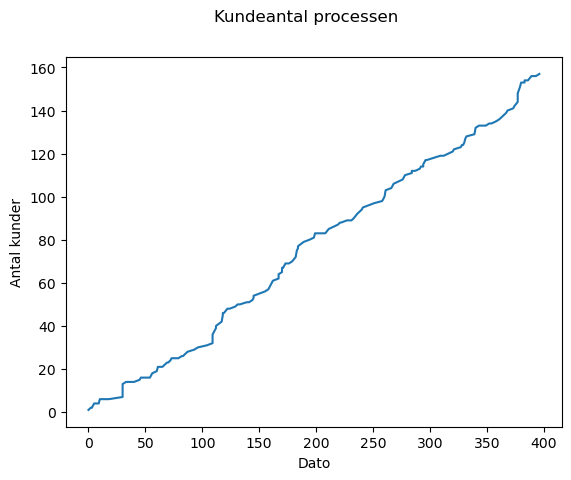

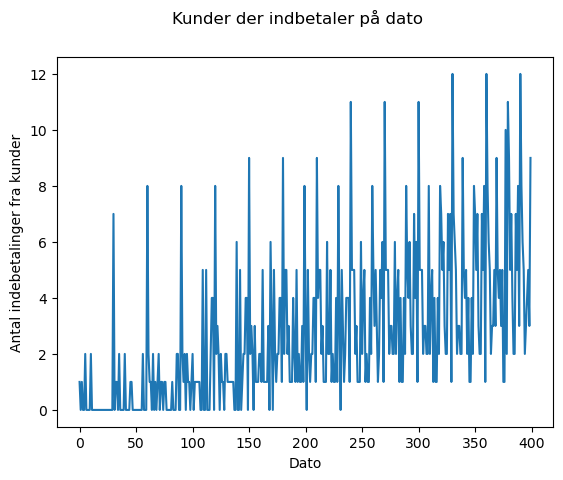

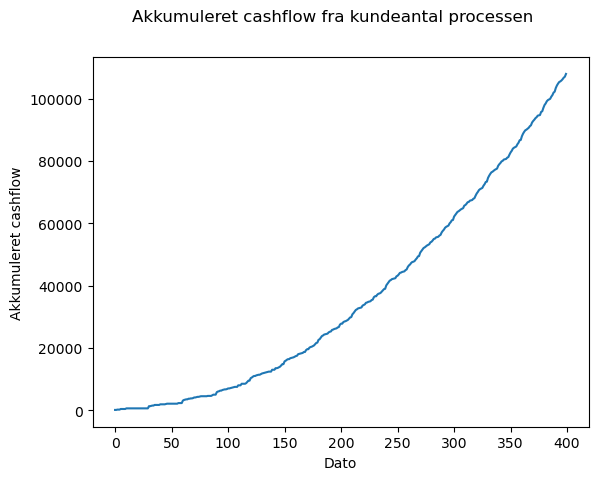

In [12]:
# cashflow process
time = 400
exptime = 0
lambd = 1
akk_kunde = 0
kunder = []
akk_kunder = []
event_times = []
cashflow = []
akk_cashflow = [] 
indbet = 100

#Kundeantal processen
while exptime < time:
    
    n = random.random()
    inter_event_time = int(round(3*(-math.log(1.0 - n) / lambd)))
    #inter_event_time = 3*(-math.log(1.0 - n) / lambd)
    
    kunde = random.poisson(lam=lambd, size=1)
    kunder.append([exptime,kunde[0]])
    
    akk_kunde = akk_kunde + kunde[0]
    akk_kunder.append(akk_kunde)
    
    event_times.append(exptime)
    exptime = exptime + inter_event_time

#antal kunder der indbetaler på datoer igennem perioden
for i in range(0,time):
    cashflow.append(0)
    
    for j in range(0,len(kunder)):
        if kunder[j][0] == i:
            cashflow[i] = cashflow[i] + kunder[j][1]
    
    if i>30 and i<time and cashflow[i-30] >= 0:
        cashflow[i] = cashflow[i] + cashflow[i-30]

#akkumuleret cashflow på kunder igennem perioden
for i in range(0,time):
    akk_cashflow.append(0)
    if i == 0:
        akk_cashflow[i] = cashflow[0]*indbet
    elif i >=0:
        akk_cashflow[i] = (cashflow[i]*indbet + akk_cashflow[i-1])
#plots
%matplotlib inline
fig = plt.figure()
fig.suptitle('Kundeantal processen')
plot, = plt.plot(event_times, akk_kunder)
plt.xlabel('Dato')
plt.ylabel('Antal kunder')
plt.show()

fig = plt.figure()
fig.suptitle('Kunder der indbetaler på dato')
plot, = plt.plot(range(0,time), cashflow)
plt.xlabel('Dato')
plt.ylabel('Antal indebetalinger fra kunder')
plt.show()

fig = plt.figure()
fig.suptitle('Akkumuleret cashflow fra kundeantal processen')
plot, = plt.plot(range(0,time), akk_cashflow)
plt.xlabel('Dato')
plt.ylabel('Akkumuleret cashflow')
plt.show()

In [ ]:
res = input()
if res == "claim number process":
        print("test")

def distribution(x):
    return x



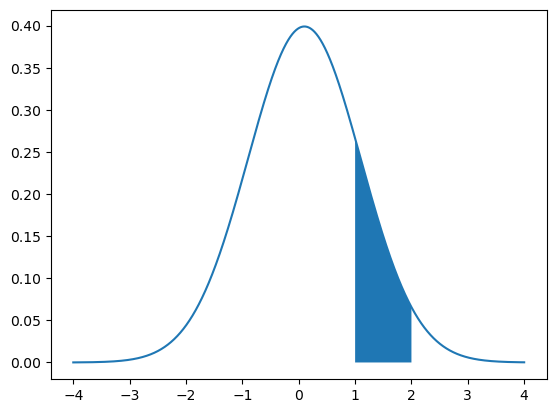

In [17]:
sample = normal(loc=50, scale=5, size=1000)
sample_mean = mean(sample)
sample_std = std(sample)
dist = norm(sample_mean, sample_std)

distribution_function = lambda x: norm.pdf(x, 0.1)
x1 = 1
x2 = 2

#integrate.quad(distribution,x1,x2)[0]


step = 0.001
whole_x = np.arange(-4, 4, step)
whole_y = list(map(distribution_function, whole_x))

needed_x = np.arange(x1, x2, step)
needed_y = list(map(distribution_function, needed_x))
plt.plot(whole_x, whole_y)
plt.fill_between(needed_x, needed_y)

#values = [value for value in range(30, 70)]
#probabilities = [dist.pdf(value) for value in values]

#sample1 = normal(loc=20, scale=5, size=300)
#sample2 = normal(loc=40, scale=5, size=700)
#sample = hstack((sample1, sample2))
# fit density
#model = KernelDensity(bandwidth=5, kernel='gaussian')
#sample = sample.reshape((len(sample), 1))
#model.fit(sample)
# sample probabilities for a range of outcomes
#values = asarray([value for value in range(1, 60)])
#values = values.reshape((len(values), 1))
#probabilities = model.score_samples(values)
#robabilities = exp(probabilities)
# plot the histogram and pdf
#pyplot.hist(sample, bins=50, density=True)
#pyplot.plot(values[:], probabilities)
#pyplot.show()



In [ ]:
input = input()

if input == "norm": #normal distribution
    data = stats.norm(scale=1, loc=0).rvs(1000)
elif input == "binom": #binomial distribution
    n = 10
    p = 10
    data = np.random.binomial(n, p, 10000)
elif input == "poiss": #poisson distribution
    data = np.random.poisson(lam=5, size=1000)
elif input == "gamma": #gamma distribution
    data = gamma.rvs(a=5, size=10000)
elif input == "exp": #exponential distribution
    data = expon.rvs(scale=1,loc=0,size=1000)
elif input == "uni": #uniform distribution
    n = 10000
    start = 10
    width = 20
    data = uniform.rvs(size=n, loc = start, scale=width)
    

ax = sns.distplot(data,
                  bins=50,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Distribution', ylabel='Frequency')
plt.show()

lambd = 1
Wi = []
c = 30
for i in range(c+1):
        if i>1:
            lst = np.random.exponential(scale=lambd, size=None)
            Wi.append(lst)
            Tn = Tn + Wi[i]
        else:
            Wi.append(i)
            Tn = 0
        

print(Wi)
print(Tn)